In [3]:
# ds083  GFS    NAM
# 1deg   0.5deg  12km
# https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/north-american-mesoscale-forecast-system-nam
# https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/global-forcast-system-gfs

In [4]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300


import wrf
from wrf import getvar, vinterp, ALL_TIMES, destagger, to_np, interplevel

In [5]:
expruns = ['20120816_d03_gfs05_p1r1', '20120816_d03_gfs05_p1r3','20120816_d03_gfs05_p1r5',
           '20120816_d03_gfs05_p2r1', '20120816_d03_gfs05_p2r3','20120816_d03_gfs05_p2r5',
           '20120816_d03_nam32_p1r1', '20120816_d03_nam32_p1r3','20120816_d03_nam32_p1r5',
           '20120816_d03_nam32_p2r1', '20120816_d03_nam32_p2r3','20120816_d03_nam32_p2r5',
           ]
expnames = ['g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5', 
            'n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']

expruns[1]

'20120816_d03_gfs05_p1r3'

In [6]:
d1 = '/media/rello/HDD/d03/'
d2 = '../../../../../d03/'
d3 = '../../../Rello/D03/'

f = d3+expruns[5]+'.nc'
print(f)


../../../Rello/D03/20120816_d03_gfs05_p2r5.nc


In [7]:
# READ WRF INTERP DATA
idw = [0,2,3,4,5,6,7,8,9,10,11]
ids = [0,1,2,7,12,17,22,27,32,37,42,47]
zlevels=['30','40','50','100','150','200','250','300','350','400','450','500']
t1, t2, t3, t4 = '2012-08-16 12:30', '2012-08-17 12:00', '2012-08-18 12:00', '2012-08-19 12:00'
t1, t4 = '2012-08-17 00:00', '2012-08-19 00:00'
tt1, tt4 = 24, 120

wrf1 = xr.open_dataset('interp30/sodar_g1r1.nc')['uv30'][tt1:tt4].values
wrf2 = xr.open_dataset('interp30/sodar_g1r3.nc')['uv30'][tt1:tt4].values
wrf3 = xr.open_dataset('interp30/sodar_g1r5.nc')['uv30'][tt1:tt4].values
wrf4 = xr.open_dataset('interp30/sodar_g2r1.nc')['uv30'][tt1:tt4].values
wrf5 = xr.open_dataset('interp30/sodar_g2r3.nc')['uv30'][tt1:tt4].values
wrf6 = xr.open_dataset('interp30/sodar_g2r5.nc')['uv30'][tt1:tt4].values
wrf7 = xr.open_dataset('interp30/sodar_n1r1.nc')['uv30'][tt1:tt4].values
wrf8 = xr.open_dataset('interp30/sodar_n1r3.nc')['uv30'][tt1:tt4].values
wrf9 = xr.open_dataset('interp30/sodar_n1r5.nc')['uv30'][tt1:tt4].values
wrf10 = xr.open_dataset('interp30/sodar_n2r1.nc')['uv30'][tt1:tt4].values
wrf11 = xr.open_dataset('interp30/sodar_n2r3.nc')['uv30'][tt1:tt4].values
wrf12 = xr.open_dataset('interp30/sodar_n2r5.nc')['uv30'][tt1:tt4].values

drw1 = xr.open_dataset('interp30/sodar_g1r1.nc')['wd30'][tt1:tt4].values
drw2 = xr.open_dataset('interp30/sodar_g1r3.nc')['wd30'][tt1:tt4].values
drw3 = xr.open_dataset('interp30/sodar_g1r5.nc')['wd30'][tt1:tt4].values
drw4 = xr.open_dataset('interp30/sodar_g2r1.nc')['wd30'][tt1:tt4].values
drw5 = xr.open_dataset('interp30/sodar_g2r3.nc')['wd30'][tt1:tt4].values
drw6 = xr.open_dataset('interp30/sodar_g1r5.nc')['wd30'][tt1:tt4].values
drw7 = xr.open_dataset('interp30/sodar_n1r1.nc')['wd30'][tt1:tt4].values
drw8 = xr.open_dataset('interp30/sodar_n1r3.nc')['wd30'][tt1:tt4].values
drw9 = xr.open_dataset('interp30/sodar_n1r5.nc')['wd30'][tt1:tt4].values
drw10 = xr.open_dataset('interp30/sodar_n2r1.nc')['wd30'][tt1:tt4].values
drw11 = xr.open_dataset('interp30/sodar_n2r3.nc')['wd30'][tt1:tt4].values
drw12 = xr.open_dataset('interp30/sodar_n2r5.nc')['wd30'][tt1:tt4].values

tv1 = xr.open_dataset('interp30/sodar_g1r1.nc')['tv30'][tt1:tt4].values
tv2 = xr.open_dataset('interp30/sodar_g1r3.nc')['tv30'][tt1:tt4].values
tv3 = xr.open_dataset('interp30/sodar_g1r5.nc')['tv30'][tt1:tt4].values
tv4 = xr.open_dataset('interp30/sodar_g2r1.nc')['tv30'][tt1:tt4].values
tv5 = xr.open_dataset('interp30/sodar_g2r3.nc')['tv30'][tt1:tt4].values
tv6 = xr.open_dataset('interp30/sodar_g2r5.nc')['tv30'][tt1:tt4].values
tv7 = xr.open_dataset('interp30/sodar_n1r1.nc')['tv30'][tt1:tt4].values
tv8 = xr.open_dataset('interp30/sodar_n1r3.nc')['tv30'][tt1:tt4].values
tv9 = xr.open_dataset('interp30/sodar_n1r5.nc')['tv30'][tt1:tt4].values
tv10 = xr.open_dataset('interp30/sodar_n2r1.nc')['tv30'][tt1:tt4].values
tv11 = xr.open_dataset('interp30/sodar_n2r3.nc')['tv30'][tt1:tt4].values
tv12 = xr.open_dataset('interp30/sodar_n2r5.nc')['tv30'][tt1:tt4].values

sread_w =  pd.read_pickle('sodar_sp.pk')
sread_d =  pd.read_pickle('sodar_dd.pk')
sread_t =  pd.read_pickle('sodar_tv.pk')
stime = sread_w.iloc[:,ids][t1:t4]

t1, t4 = '2012-08-17 00:00', '2012-08-19 00:00'
sodarw =  sread_w.iloc[:,ids][t1:t4].interpolate().values
sodard =  sread_d.iloc[:,ids][t1:t4].interpolate().values
sodart =  sread_t.iloc[:,ids][t1:t4].interpolate().values
xt = sread_w.iloc[:,ids]['2012-08-17 00:00':'2012-08-19 00:00'].index

color1 = '0.3'
color2 = '0.7'
lw = 0.8

In [8]:
tt = 0
xp = 0
# Funcion para calcular tiempo de grafica
xp = 0 
def utcwrf(tt, timedelta):   
    ttw = 72+tt*3 # Se le suman 12 horas (72 dt) para el comenzar en fecha 17 agosto
    fd =d3+expruns[xp]+'.nc'
    ncfile = Dataset(fd)  
    wa = getvar(ncfile, "wa", units="m s-1", timeidx=ttw)
    wt = to_np(wa[0,0,0].Time)
    localt = wt + np.timedelta64(timedelta, 'h')
    t = pd.to_datetime(str(localt))
    sodartp = stime.index[tt]
    print('ncwrf ', wt, 'nclocalt ', t,  'sodart', sodartp)
    return(ttw, t, sodartp)
        
timedelta = -6
_, t, _ = utcwrf(tt, timedelta)

ncwrf  2012-08-17T06:00:00.000000000 nclocalt  2012-08-17 00:00:00 sodart 2012-08-17 00:00:00


In [9]:
def ProfilesPanel3n(tt0, tt, tt2):
    print(tt0, tt, tt2)
    fig, axs = plt.subplots(1, 3, figsize=(13,8))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.1)
    axs[0].set_ylabel('m AGL')
    #axs[1].set_ylabel('m AGL')
    axs[0].set_xlabel('Velocidad')
    axs[1].set_xlabel('Velocidad')
    axs[2].set_xlabel('Velocidad')
    plot_levs = [30,40,50,100,150,200,250,300,350,400,450,500]
     
    ax = axs[0]
    ax.set_title(xt[tt0])
    ax.plot(sodarw[tt0,:], plot_levs, label='Obs ', ls='solid', color='b')
    vdir = np.radians(sodard[tt0,:])
    xx, uu, vv = sodarw[tt0,:], -np.sin(vdir), -np.cos(vdir)
    ax.quiver(xx, plot_levs, uu, vv, pivot='mid', color='b')
    
    ax.plot(wrf7[tt0,:], plot_levs, label=expnames[6],  ls='-',  color=color1)
    ax.plot(wrf8[tt0,:], plot_levs, label=expnames[7],  ls='--',  color=color1)
    ax.plot(wrf9[tt0,:], plot_levs, label=expnames[8],  ls=':' ,  color=color1)
    ax.plot(wrf10[tt0,:], plot_levs, label=expnames[9], ls='-',  color=color2)
    ax.plot(wrf11[tt0,:], plot_levs, label=expnames[10], ls='--', color=color2)
    ax.plot(wrf12[tt0,:], plot_levs, label=expnames[11], ls=':' , color=color2)     
    ax.legend()

    ax = axs[1]
    ax.set_title(xt[tt])
    ax.plot(sodarw[tt,:], plot_levs, label='Obs ', ls='solid', color='b')
    vdir = np.radians(sodard[tt,:])
    xx, uu, vv = sodarw[tt,:], -np.sin(vdir), -np.cos(vdir)
    ax.quiver(xx, plot_levs, uu, vv, pivot='mid', color='b')

    ax.plot(wrf7[tt,:], plot_levs, label=expnames[6], ls='-', color=color1)
    ax.plot(wrf8[tt,:], plot_levs, label=expnames[7], ls='--', color=color1)
    ax.plot(wrf9[tt,:], plot_levs, label=expnames[8], ls=':',  color=color1)
    ax.plot(wrf10[tt,:], plot_levs, label=expnames[9], ls='-',  color=color2)
    ax.plot(wrf11[tt,:], plot_levs, label=expnames[10], ls='--', color=color2)
    ax.plot(wrf12[tt,:], plot_levs, label=expnames[11], ls=':',  color=color2)     
    ax.legend()
    
    
    ax = axs[2]
    ax.set_title(xt[tt2])
    ax.plot(sodarw[tt2,:], plot_levs, label='Obs ', ls='solid', color='b')
    vdir = np.radians(sodard[tt2,:])
    xx, uu, vv = sodarw[tt2,:], -np.sin(vdir), -np.cos(vdir)
    ax.quiver(xx, plot_levs, uu, vv, pivot='mid', color='b')
    
    ax.plot(wrf7[tt2,:], plot_levs, label=expnames[6], ls='-' , color=color1)
    ax.plot(wrf8[tt2,:], plot_levs, label=expnames[7], ls='--', color=color1)
    ax.plot(wrf9[tt2,:], plot_levs, label=expnames[8], ls=':' , color=color1)
    ax.plot(wrf10[tt2,:], plot_levs, label=expnames[9],  ls='-', color=color2)
    ax.plot(wrf11[tt2,:], plot_levs, label=expnames[10], ls='--', color=color2)
    ax.plot(wrf12[tt2,:], plot_levs, label=expnames[11], ls=':' , color=color2)    
    ax.legend()

    #plt.savefig('ProfilesPanel_'+skey+'.png', dpi=300)

In [10]:
def ProfilesPanel3nT(tt0, tt, tt2):
    print(tt0, tt, tt2)
    fig, axs = plt.subplots(1, 3, figsize=(13,8))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.1)
    axs[0].set_ylabel('m AGL')
    axs[0].set_xlabel('Temp Virtual')
    axs[1].set_xlabel('Temp Virtual')
    axs[2].set_xlabel('Temp Virtual')
    plot_levs = [30,40,50,100,150,200,250,300,350,400,450,500]
     
    ax = axs[0]
    ax.set_title(xt[tt0])
    ax.plot(sodart[tt0,:], plot_levs, label='Obs ', ls='solid', color='r')
    
    ax.plot(tv7[tt0,:], plot_levs, label=expnames[6],  ls='-',  color=color1)
    ax.plot(tv8[tt0,:], plot_levs, label=expnames[7],  ls='--',  color=color1)
    ax.plot(tv9[tt0,:], plot_levs, label=expnames[8],  ls=':' ,  color=color1)
    ax.plot(tv10[tt0,:], plot_levs, label=expnames[9], ls='-',  color=color2)
    ax.plot(tv11[tt0,:], plot_levs, label=expnames[10], ls='--', color=color2)
    ax.plot(tv12[tt0,:], plot_levs, label=expnames[11], ls=':' , color=color2)     
    ax.legend()

    ax = axs[1]
    ax.set_title(xt[tt])
    ax.plot(sodart[tt,:], plot_levs, label='Obs ', ls='solid', color='r')

    ax.plot(tv7[tt,:], plot_levs, label=expnames[6], ls='-', color=color1)
    ax.plot(tv8[tt,:], plot_levs, label=expnames[7], ls='--', color=color1)
    ax.plot(tv9[tt,:], plot_levs, label=expnames[8], ls=':',  color=color1)
    ax.plot(tv10[tt,:], plot_levs, label=expnames[9], ls='-',  color=color2)
    ax.plot(tv11[tt,:], plot_levs, label=expnames[10], ls='--', color=color2)
    ax.plot(tv12[tt,:], plot_levs, label=expnames[11], ls=':',  color=color2)     
    ax.legend()
    
    
    ax = axs[2]
    ax.set_title(xt[tt2])
    ax.plot(sodart[tt2,:], plot_levs, label='Obs ', ls='solid', color='r')
    
    ax.plot(tv7[tt2,:], plot_levs, label=expnames[6], ls='-' , color=color1)
    ax.plot(tv8[tt2,:], plot_levs, label=expnames[7], ls='--', color=color1)
    ax.plot(tv9[tt2,:], plot_levs, label=expnames[8], ls=':' , color=color1)
    ax.plot(tv10[tt2,:], plot_levs, label=expnames[9],  ls='-', color=color2)
    ax.plot(tv11[tt2,:], plot_levs, label=expnames[10], ls='--', color=color2)
    ax.plot(tv12[tt2,:], plot_levs, label=expnames[11], ls=':' , color=color2)    
    ax.legend()

    #plt.savefig('ProfilesPanel_'+skey+'.png', dpi=300)

In [11]:
def ProfilesPanel3g(tt0, tt, tt2):
    print(tt0, tt, tt2)
    fig, axs = plt.subplots(1, 3, figsize=(13,8))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.1)
    axs[0].set_ylabel('m AGL')
    #axs[1].set_ylabel('m AGL')
    axs[0].set_xlabel('Velocidad')
    axs[1].set_xlabel('Velocidad')
    axs[2].set_xlabel('Velocidad')
    plot_levs = [30,40,50,100,150,200,250,300,350,400,450,500]
     
    ax = axs[0]
    ax.set_title(xt[tt0])
    ax.plot(sodarw[tt0,:], plot_levs, label='Obs ', ls='solid', color='b')
    vdir = np.radians(sodard[tt0,:])
    xx, uu, vv = sodarw[tt0,:], -np.sin(vdir), -np.cos(vdir)
    ax.quiver(xx, plot_levs, uu, vv, pivot='mid', color='b')
    
    ax.plot(wrf1[tt0,:], plot_levs, label=expnames[0], ls='-', color=color1)
    ax.plot(wrf2[tt0,:], plot_levs, label=expnames[1], ls='--', color=color1)
    ax.plot(wrf3[tt0,:], plot_levs, label=expnames[2], ls=':', color=color1)
    ax.plot(wrf4[tt0,:], plot_levs, label=expnames[3], ls='-',  color=color2)
    ax.plot(wrf5[tt0,:], plot_levs, label=expnames[4], ls='--', color=color2)      
    ax.plot(wrf6[tt0,:], plot_levs, label=expnames[5], ls=':', color=color2)
    ax.legend()


    ax = axs[1]
    ax.set_title(xt[tt])
    ax.plot(sodarw[tt,:], plot_levs, label='Obs ', ls='solid', color='b')
    vdir = np.radians(sodard[tt,:])
    xx, uu, vv = sodarw[tt,:], -np.sin(vdir), -np.cos(vdir)
    ax.quiver(xx, plot_levs, uu, vv, pivot='mid', color='b')
    
    ax.plot(wrf1[tt,:], plot_levs, label=expnames[0], ls='-',  color=color1)
    ax.plot(wrf2[tt,:], plot_levs, label=expnames[1], ls='--', color=color1)
    ax.plot(wrf3[tt,:], plot_levs, label=expnames[2], ls=':', color=color1)
    ax.plot(wrf4[tt,:], plot_levs, label=expnames[3], ls='-',  color=color2)
    ax.plot(wrf5[tt,:], plot_levs, label=expnames[4], ls='--', color=color2)      
    ax.plot(wrf6[tt,:], plot_levs, label=expnames[5], ls=':', color=color2)
    ax.legend()

    
    ax = axs[2]
    ax.set_title(xt[tt2])
    ax.plot(sodarw[tt2,:], plot_levs, label='Obs ', ls='solid', color='b')
    vdir = np.radians(sodard[tt2,:])
    xx, uu, vv = sodarw[tt2,:], -np.sin(vdir), -np.cos(vdir)
    ax.quiver(xx, plot_levs, uu, vv, pivot='mid', color='b')
    
    ax.plot(wrf1[tt2,:], plot_levs, label=expnames[0], ls='-',  color=color1)
    ax.plot(wrf2[tt2,:], plot_levs, label=expnames[1], ls='--', color=color1)
    ax.plot(wrf3[tt2,:], plot_levs, label=expnames[2], ls=':', color=color1)
    ax.plot(wrf4[tt2,:], plot_levs, label=expnames[3], ls='-' , color=color2)
    ax.plot(wrf5[tt2,:], plot_levs, label=expnames[4], ls='--', color=color2)      
    ax.plot(wrf6[tt2,:], plot_levs, label=expnames[5], ls=':', color=color2)
    ax.legend()

    #plt.savefig('ProfilesPanel_'+skey+'.png', dpi=300)

In [64]:
def ProfilesPanel3gn(tt0, tt, tt2):
    print(tt0, tt, tt2)
    fig, axs = plt.subplots(1, 3, figsize=(13,8))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.1)
    axs[0].set_ylabel('m AGL')
    #axs[1].set_ylabel('m AGL')
    axs[0].set_xlabel('Velocidad')
    axs[1].set_xlabel('Velocidad')
    axs[2].set_xlabel('Velocidad')
    plot_levs = [30,40,50,100,150,200,250,300,350,400,450,500]
     
    ax = axs[0]
    ax.set_title(xt[tt0])
    ax.plot(sodarw[tt0,:], plot_levs, label='Obs ', ls='solid', color='b')
    vdir = np.radians(sodard[tt0,:])
    xx, uu, vv = sodarw[tt0,:], -np.sin(vdir), -np.cos(vdir)
    ax.quiver(xx, plot_levs, uu, vv, pivot='mid', color='b')

    ax.plot(wrf1[tt0,:], plot_levs, label=expnames[0], ls='-', color=color1)
    ax.plot(wrf2[tt0,:], plot_levs, label=expnames[1], ls='--', color=color1)
    ax.plot(wrf3[tt0,:], plot_levs, label=expnames[2], ls=':', color=color1)
    ax.plot(wrf4[tt0,:], plot_levs, label=expnames[3], ls='-',  color=color2)
    ax.plot(wrf5[tt0,:], plot_levs, label=expnames[4], ls='--', color=color2)      
    ax.plot(wrf6[tt0,:], plot_levs, label=expnames[5], ls=':', color=color2)
    ax.plot(wrf7[tt0,:], plot_levs, label=expnames[6],  ls='-',  color=color1)
    ax.plot(wrf8[tt0,:], plot_levs, label=expnames[7],  ls='--',  color=color1)
    ax.plot(wrf9[tt0,:], plot_levs, label=expnames[8],  ls=':' ,  color=color1)
    ax.plot(wrf10[tt0,:], plot_levs, label=expnames[9], ls='-',  color=color2)
    ax.plot(wrf11[tt0,:], plot_levs, label=expnames[10], ls='--', color=color2)
    ax.plot(wrf12[tt0,:], plot_levs, label=expnames[11], ls=':' , color=color2)     
    ax.legend()

    ax = axs[1]
    ax.set_title(xt[tt])
    ax.plot(sodarw[tt,:], plot_levs, label='Obs ', ls='solid', color='b')
    vdir = np.radians(sodard[tt,:])
    xx, uu, vv = sodarw[tt,:], -np.sin(vdir), -np.cos(vdir)
    ax.quiver(xx, plot_levs, uu, vv, pivot='mid', color='b')

    ax.plot(wrf1[tt,:], plot_levs, label=expnames[0], ls='-',  color=color1)
    ax.plot(wrf2[tt,:], plot_levs, label=expnames[1], ls='--', color=color1)
    ax.plot(wrf3[tt,:], plot_levs, label=expnames[2], ls=':', color=color1)
    ax.plot(wrf4[tt,:], plot_levs, label=expnames[3], ls='-',  color=color2)
    ax.plot(wrf5[tt,:], plot_levs, label=expnames[4], ls='--', color=color2)      
    ax.plot(wrf6[tt,:], plot_levs, label=expnames[5], ls=':', color=color2)
    ax.plot(wrf7[tt,:], plot_levs, label=expnames[6], ls='-', color=color1)
    ax.plot(wrf8[tt,:], plot_levs, label=expnames[7], ls='--', color=color1)
    ax.plot(wrf9[tt,:], plot_levs, label=expnames[8], ls=':',  color=color1)
    ax.plot(wrf10[tt,:], plot_levs, label=expnames[9], ls='-',  color=color2)
    ax.plot(wrf11[tt,:], plot_levs, label=expnames[10], ls='--', color=color2)
    ax.plot(wrf12[tt,:], plot_levs, label=expnames[11], ls=':',  color=color2)     
    ax.legend()
    
    
    ax = axs[2]
    ax.set_title(xt[tt2])
    ax.plot(sodarw[tt2,:], plot_levs, label='Obs ', ls='solid', color='b')
    vdir = np.radians(sodard[tt2,:])
    xx, uu, vv = sodarw[tt2,:], -np.sin(vdir), -np.cos(vdir)
    ax.quiver(xx, plot_levs, uu, vv, pivot='mid', color='b')
    
    ax.plot(wrf1[tt2,:], plot_levs, label=expnames[0], ls='-',  color=color1)
    ax.plot(wrf2[tt2,:], plot_levs, label=expnames[1], ls='--', color=color1)
    ax.plot(wrf3[tt2,:], plot_levs, label=expnames[2], ls=':', color=color1)
    ax.plot(wrf4[tt2,:], plot_levs, label=expnames[3], ls='-' , color=color2)
    ax.plot(wrf5[tt2,:], plot_levs, label=expnames[4], ls='--', color=color2)      
    ax.plot(wrf6[tt2,:], plot_levs, label=expnames[5], ls=':', color=color2)
    ax.plot(wrf7[tt2,:], plot_levs, label=expnames[6], ls='-' , color=color1)
    ax.plot(wrf8[tt2,:], plot_levs, label=expnames[7], ls='--', color=color1)
    ax.plot(wrf9[tt2,:], plot_levs, label=expnames[8], ls=':' , color=color1)
    ax.plot(wrf10[tt2,:], plot_levs, label=expnames[9],  ls='-', color=color2)
    ax.plot(wrf11[tt2,:], plot_levs, label=expnames[10], ls='--', color=color2)
    ax.plot(wrf12[tt2,:], plot_levs, label=expnames[11], ls=':' , color=color2)    
    ax.legend()

    #plt.savefig('ProfilesPanel_'+skey+'.png', dpi=300)

In [12]:
def ProfilesPanel3gT(tt0, tt, tt2):
    print(tt0, tt, tt2)
    fig, axs = plt.subplots(1, 3, figsize=(13,8))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.1)
    axs[0].set_ylabel('m AGL')
    axs[0].set_xlabel('Temp Virtual')
    axs[1].set_xlabel('Temp Virtual')
    axs[2].set_xlabel('Temp Virtual')
    plot_levs = [30,40,50,100,150,200,250,300,350,400,450,500]
     
    ax = axs[0]
    ax.set_title(xt[tt0])
    ax.plot(sodart[tt0,:], plot_levs, label='Obs ', ls='solid', color='r')
    
    ax.plot(tv1[tt0,:], plot_levs, label=expnames[0], ls='-', color=color1)
    ax.plot(tv2[tt0,:], plot_levs, label=expnames[1], ls='--', color=color1)
    ax.plot(tv3[tt0,:], plot_levs, label=expnames[2], ls=':', color=color1)
    ax.plot(tv4[tt0,:], plot_levs, label=expnames[3], ls='-',  color=color2)
    ax.plot(tv5[tt0,:], plot_levs, label=expnames[4], ls='--', color=color2)      
    ax.plot(tv6[tt0,:], plot_levs, label=expnames[5], ls=':', color=color2)
    ax.legend()


    ax = axs[1]
    ax.set_title(xt[tt])
    ax.plot(sodart[tt,:], plot_levs, label='Obs ', ls='solid', color='r')
    
    ax.plot(tv1[tt,:], plot_levs, label=expnames[0], ls='-',  color=color1)
    ax.plot(tv2[tt,:], plot_levs, label=expnames[1], ls='--', color=color1)
    ax.plot(tv3[tt,:], plot_levs, label=expnames[2], ls=':', color=color1)
    ax.plot(tv4[tt,:], plot_levs, label=expnames[3], ls='-',  color=color2)
    ax.plot(tv5[tt,:], plot_levs, label=expnames[4], ls='--', color=color2)      
    ax.plot(tv6[tt,:], plot_levs, label=expnames[5], ls=':', color=color2)
    ax.legend()

    
    ax = axs[2]
    ax.set_title(xt[tt2])
    ax.plot(sodart[tt2,:], plot_levs, label='Obs ', ls='solid', color='r')
    
    ax.plot(tv1[tt2,:], plot_levs, label=expnames[0], ls='-',  color=color1)
    ax.plot(tv2[tt2,:], plot_levs, label=expnames[1], ls='--', color=color1)
    ax.plot(tv3[tt2,:], plot_levs, label=expnames[2], ls=':', color=color1)
    ax.plot(tv4[tt2,:], plot_levs, label=expnames[3], ls='-' , color=color2)
    ax.plot(tv5[tt2,:], plot_levs, label=expnames[4], ls='--', color=color2)      
    ax.plot(tv6[tt2,:], plot_levs, label=expnames[5], ls=':', color=color2)
    ax.legend()

    #plt.savefig('ProfilesPanel_'+skey+'.png', dpi=300)

In [13]:
pd.plotting.register_matplotlib_converters()

def panelPlot2Tgn(level):
    fig, axs = plt.subplots(2, 2, figsize=(10,8))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.1, hspace=0.2)
    for axl in range(0,2):
        for axc in range(0,2):
            plt.setp( axs[axl,axc].xaxis.get_majorticklabels(), rotation=25 )
            axs[axl,axc].grid()
            axs[0,0].set_ylabel('Temp Virtual')
            axs[1,0].set_ylabel('Temp Virtual')

    ax = axs[0, 0]
    ax.set_ylim([tv_1, tv_2])
    ax.plot(xt[t1:t2], sodart[t1:t2,level], label=' OBS')
    ax.plot(xt[t1:t2], tv1[t1:t2, level], label=expnames[0], linewidth=lw, ls='-', color=color1)
    ax.plot(xt[t1:t2], tv2[t1:t2, level], label=expnames[1], linewidth=lw, ls='--', color=color1)
    ax.plot(xt[t1:t2], tv3[t1:t2, level], label=expnames[2], linewidth=lw, ls=':', color=color1)
    ax.plot(xt[t1:t2], tv4[t1:t2, level], label=expnames[3], linewidth=lw, ls='-', color=color2)
    ax.plot(xt[t1:t2], tv5[t1:t2, level], label=expnames[4], linewidth=lw, ls='--', color=color2)
    ax.plot(xt[t1:t2], tv6[t1:t2, level], label=expnames[5], linewidth=lw, ls=':', color=color2)
    ax.legend();

    ax = axs[0, 1]
    ax.set_ylim([tv_1, tv_2])
    ax.plot(xt[t3:t4], sodart[t3:t4,level], label=' OBS')
    ax.plot(xt[t3:t4], tv1[t3:t4, level], label=expnames[0], linewidth=lw, ls='-', color=color1)
    ax.plot(xt[t3:t4], tv2[t3:t4, level], label=expnames[1], linewidth=lw, ls='--', color=color1)
    ax.plot(xt[t3:t4], tv3[t3:t4, level], label=expnames[2], linewidth=lw, ls=':', color=color1)
    ax.plot(xt[t3:t4], tv4[t3:t4, level], label=expnames[3], linewidth=lw, ls='-', color=color2)
    ax.plot(xt[t3:t4], tv5[t3:t4, level], label=expnames[4], linewidth=lw, ls='--', color=color2)
    ax.plot(xt[t3:t4], tv6[t3:t4, level], label=expnames[5], linewidth=lw, ls=':', color=color2)
    ax.legend();


    ax = axs[1, 0]
    ax.set_ylim([tv_1, tv_2])
    ax.plot(xt[t1:t2], sodart[t1:t2,level], label=' OBS')
    ax.plot(xt[t1:t2], tv7[t1:t2, level], label=expnames[6],   linewidth=lw, ls='-', color=color1)
    ax.plot(xt[t1:t2], tv8[t1:t2, level], label=expnames[7],   linewidth=lw, ls='--', color=color1)
    ax.plot(xt[t1:t2], tv9[t1:t2, level], label=expnames[8],   linewidth=lw, ls=':', color=color1)
    ax.plot(xt[t1:t2], tv10[t1:t2, level], label=expnames[9],  linewidth=lw, ls='-', color=color2)
    ax.plot(xt[t1:t2], tv11[t1:t2, level], label=expnames[10], linewidth=lw, ls='--', color=color2)
    ax.plot(xt[t1:t2], tv12[t1:t2, level], label=expnames[11], linewidth=lw, ls=':', color=color2)
    ax.legend();

    ax = axs[1, 1]
    ax.set_ylim([tv_1, tv_2])
    ax.plot(xt[t3:t4], sodart[t3:t4,level], label=' OBS')

    ax.plot(xt[t3:t4],  tv7[t3:t4, level], label=expnames[6],  linewidth=lw, ls='-', color=color1)
    ax.plot(xt[t3:t4],  tv8[t3:t4, level], label=expnames[7],  linewidth=lw, ls='--', color=color1)
    ax.plot(xt[t3:t4],  tv9[t3:t4, level], label=expnames[8],  linewidth=lw, ls=':', color=color1)
    ax.plot(xt[t3:t4], tv10[t3:t4, level], label=expnames[9],  linewidth=lw, ls='-', color=color2)
    ax.plot(xt[t3:t4], tv11[t3:t4, level], label=expnames[10], linewidth=lw, ls='--', color=color2)
    ax.plot(xt[t3:t4], tv12[t3:t4, level], label=expnames[11], linewidth=lw, ls=':', color=color2)
    ax.legend();

    plt.title('Temp Virtual SODAR y Exp tv @ '+zlevels[level]+'m', x=0.0, y=2.25)


    #print(level, skey, wkey)
    #plt.savefig('figs/panelPlotd'+skey+'.png', dpi=300)

In [34]:
pd.plotting.register_matplotlib_converters()

def panelPlot2gn(level):
    fig, axs = plt.subplots(2, 2, figsize=(10,8))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.1, hspace=0.2)
    for axl in range(0,2):
        for axc in range(0,2):
            plt.setp( axs[axl,axc].xaxis.get_majorticklabels(), rotation=25 )
            axs[axl,axc].grid()
            axs[0,0].set_ylabel('GFS Velocidad de viento')
            axs[1,0].set_ylabel('NAM Velocidad de viento')

    ax = axs[0, 0]
    ax.set_ylim([0, 14])
    ax.plot(xt[t1:t2], sodarw[t1:t2,level], label=' OBS')
    ax.plot(xt[t1:t2], wrf1[t1:t2, level], label=expnames[0], linewidth=lw, ls='-', color=color1)
    ax.plot(xt[t1:t2], wrf2[t1:t2, level], label=expnames[1], linewidth=lw, ls='--', color=color1)
    ax.plot(xt[t1:t2], wrf3[t1:t2, level], label=expnames[2], linewidth=lw, ls=':', color=color1)
    ax.plot(xt[t1:t2], wrf4[t1:t2, level], label=expnames[3], linewidth=lw, ls='-', color=color2)
    ax.plot(xt[t1:t2], wrf5[t1:t2, level], label=expnames[4], linewidth=lw, ls='--', color=color2)
    ax.plot(xt[t1:t2], wrf6[t1:t2, level], label=expnames[5], linewidth=lw, ls=':', color=color2)
    ax.legend();

    ax = axs[0, 1]
    ax.set_ylim([0, 14])
    ax.plot(xt[t3:t4], sodarw[t3:t4,level], label=' OBS')
    ax.plot(xt[t3:t4], wrf1[t3:t4, level], label=expnames[0], linewidth=lw, ls='-', color=color1)
    ax.plot(xt[t3:t4], wrf2[t3:t4, level], label=expnames[1], linewidth=lw, ls='--', color=color1)
    ax.plot(xt[t3:t4], wrf3[t3:t4, level], label=expnames[2], linewidth=lw, ls=':', color=color1)
    ax.plot(xt[t3:t4], wrf4[t3:t4, level], label=expnames[3], linewidth=lw, ls='-', color=color2)
    ax.plot(xt[t3:t4], wrf5[t3:t4, level], label=expnames[4], linewidth=lw, ls='--', color=color2)
    ax.plot(xt[t3:t4], wrf6[t3:t4, level], label=expnames[5], linewidth=lw, ls=':', color=color2)
    ax.legend();


    ax = axs[1, 0]
    ax.set_ylim([0, 14])
    ax.plot(xt[t1:t2], sodarw[t1:t2,level], label=' OBS')
    ax.plot(xt[t1:t2], wrf7[t1:t2, level], label=expnames[6],   linewidth=lw, ls='-', color=color1)
    ax.plot(xt[t1:t2], wrf8[t1:t2, level], label=expnames[7],   linewidth=lw, ls='--', color=color1)
    ax.plot(xt[t1:t2], wrf9[t1:t2, level], label=expnames[8],   linewidth=lw, ls=':', color=color1)
    ax.plot(xt[t1:t2], wrf10[t1:t2, level], label=expnames[9],  linewidth=lw, ls='-', color=color2)
    ax.plot(xt[t1:t2], wrf11[t1:t2, level], label=expnames[10], linewidth=lw, ls='--', color=color2)
    ax.plot(xt[t1:t2], wrf12[t1:t2, level], label=expnames[11], linewidth=lw, ls=':', color=color2)
    ax.legend();

    ax = axs[1, 1]
    ax.set_ylim([0, 14])
    ax.plot(xt[t3:t4], sodarw[t3:t4,level], label=' OBS')

    ax.plot(xt[t3:t4],  wrf7[t3:t4, level], label=expnames[6],  linewidth=lw, ls='-', color=color1)
    ax.plot(xt[t3:t4],  wrf8[t3:t4, level], label=expnames[7],  linewidth=lw, ls='--', color=color1)
    ax.plot(xt[t3:t4],  wrf9[t3:t4, level], label=expnames[8],  linewidth=lw, ls=':', color=color1)
    ax.plot(xt[t3:t4], wrf10[t3:t4, level], label=expnames[9],  linewidth=lw, ls='-', color=color2)
    ax.plot(xt[t3:t4], wrf11[t3:t4, level], label=expnames[10], linewidth=lw, ls='--', color=color2)
    ax.plot(xt[t3:t4], wrf12[t3:t4, level], label=expnames[11], linewidth=lw, ls=':', color=color2)
    ax.legend();

    plt.title('Velocidad SODAR y Exp WRF @ '+zlevels[level]+'m', x=0.0, y=2.25)


    #print(level, skey, wkey)
    #plt.savefig('figs/panelPlotd'+skey+'.png', dpi=300)

In [60]:
pd.plotting.register_matplotlib_converters()

def panelPlot3gn(level):
    fig, axs = plt.subplots(2, 1, figsize=(8,5))
    #fig.subplots_adjust(left=0.08, right=0.98, wspace=0.1, hspace=0.2)

#    for axc in range(0,2):
#        plt.setp( axs[0,axc].xaxis.get_majorticklabels(), rotation=25 )
#        axs[0,axc].grid()
#        axs[0,0].set_ylabel('GFS Velocidad de viento')
#        axs[0,0].set_ylabel('NAM Velocidad de viento')
    
    plt.setp( axs[0].xaxis.get_majorticklabels(), rotation=25 )
    plt.setp( axs[1].xaxis.get_majorticklabels(), rotation=25 )
    axs[0].grid()
    axs[1].grid()
    ax = axs[0]
    ax.set_ylim([0, 14])
    ax.plot(xt[t1:t2], sodarw[t1:t2,level], label=' OBS')
    ax.plot(xt[t1:t2], wrf1[t1:t2, level], label=expnames[0], linewidth=lw, ls='-', color=color1)
    ax.plot(xt[t1:t2], wrf2[t1:t2, level], label=expnames[1], linewidth=lw, ls='--', color=color1)
    ax.plot(xt[t1:t2], wrf3[t1:t2, level], label=expnames[2], linewidth=lw, ls=':', color=color1)
    ax.plot(xt[t1:t2], wrf4[t1:t2, level], label=expnames[3], linewidth=lw, ls='-', color=color2)
    ax.plot(xt[t1:t2], wrf5[t1:t2, level], label=expnames[4], linewidth=lw, ls='--', color=color2)
    ax.plot(xt[t1:t2], wrf6[t1:t2, level], label=expnames[5], linewidth=lw, ls=':', color=color2)
    ax.plot(xt[t3:t4],  wrf7[t3:t4, level], label=expnames[6],  linewidth=lw, ls='-', color=color1)
    ax.plot(xt[t3:t4],  wrf8[t3:t4, level], label=expnames[7],  linewidth=lw, ls='--', color=color1)
    ax.plot(xt[t3:t4],  wrf9[t3:t4, level], label=expnames[8],  linewidth=lw, ls=':', color=color1)
    ax.plot(xt[t3:t4], wrf10[t3:t4, level], label=expnames[9],  linewidth=lw, ls='-', color=color2)
    ax.plot(xt[t3:t4], wrf11[t3:t4, level], label=expnames[10], linewidth=lw, ls='--', color=color2)
    ax.plot(xt[t3:t4], wrf12[t3:t4, level], label=expnames[11], linewidth=lw, ls=':', color=color2)
    ax.legend();
    
    ax = axs[1]
    ax.set_ylim([0, 14])
    ax.plot(xt[t1:t2], sodarw[t1:t2,level], label=' OBS')
    ax.plot(xt[t3:t4], sodarw[t3:t4,level], label=' OBS')
    ax.plot(xt[t3:t4], wrf1[t3:t4, level], label=expnames[0], linewidth=lw, ls='-', color=color1)
    ax.plot(xt[t3:t4], wrf2[t3:t4, level], label=expnames[1], linewidth=lw, ls='--', color=color1)
    ax.plot(xt[t3:t4], wrf3[t3:t4, level], label=expnames[2], linewidth=lw, ls=':', color=color1)
    ax.plot(xt[t3:t4], wrf4[t3:t4, level], label=expnames[3], linewidth=lw, ls='-', color=color2)
    ax.plot(xt[t3:t4], wrf5[t3:t4, level], label=expnames[4], linewidth=lw, ls='--', color=color2)
    ax.plot(xt[t3:t4], wrf6[t3:t4, level], label=expnames[5], linewidth=lw, ls=':', color=color2)
    ax.plot(xt[t1:t2], wrf7[t1:t2, level], label=expnames[6],   linewidth=lw, ls='-', color=color1)
    ax.plot(xt[t1:t2], wrf8[t1:t2, level], label=expnames[7],   linewidth=lw, ls='--', color=color1)
    ax.plot(xt[t1:t2], wrf9[t1:t2, level], label=expnames[8],   linewidth=lw, ls=':', color=color1)
    ax.plot(xt[t1:t2], wrf10[t1:t2, level], label=expnames[9],  linewidth=lw, ls='-', color=color2)
    ax.plot(xt[t1:t2], wrf11[t1:t2, level], label=expnames[10], linewidth=lw, ls='--', color=color2)
    ax.plot(xt[t1:t2], wrf12[t1:t2, level], label=expnames[11], linewidth=lw, ls=':', color=color2)
    ax.legend();
    ax.plot(xt[t3:t4], sodarw[t3:t4,level], label=' OBS')
    
    

    #plt.title('Velocidad SODAR y Exp WRF @ '+zlevels[level]+'m', x=0.0, y=2.25)


    #print(level, skey, wkey)
    #plt.savefig('figs/panelPlotd'+skey+'.png', dpi=300)

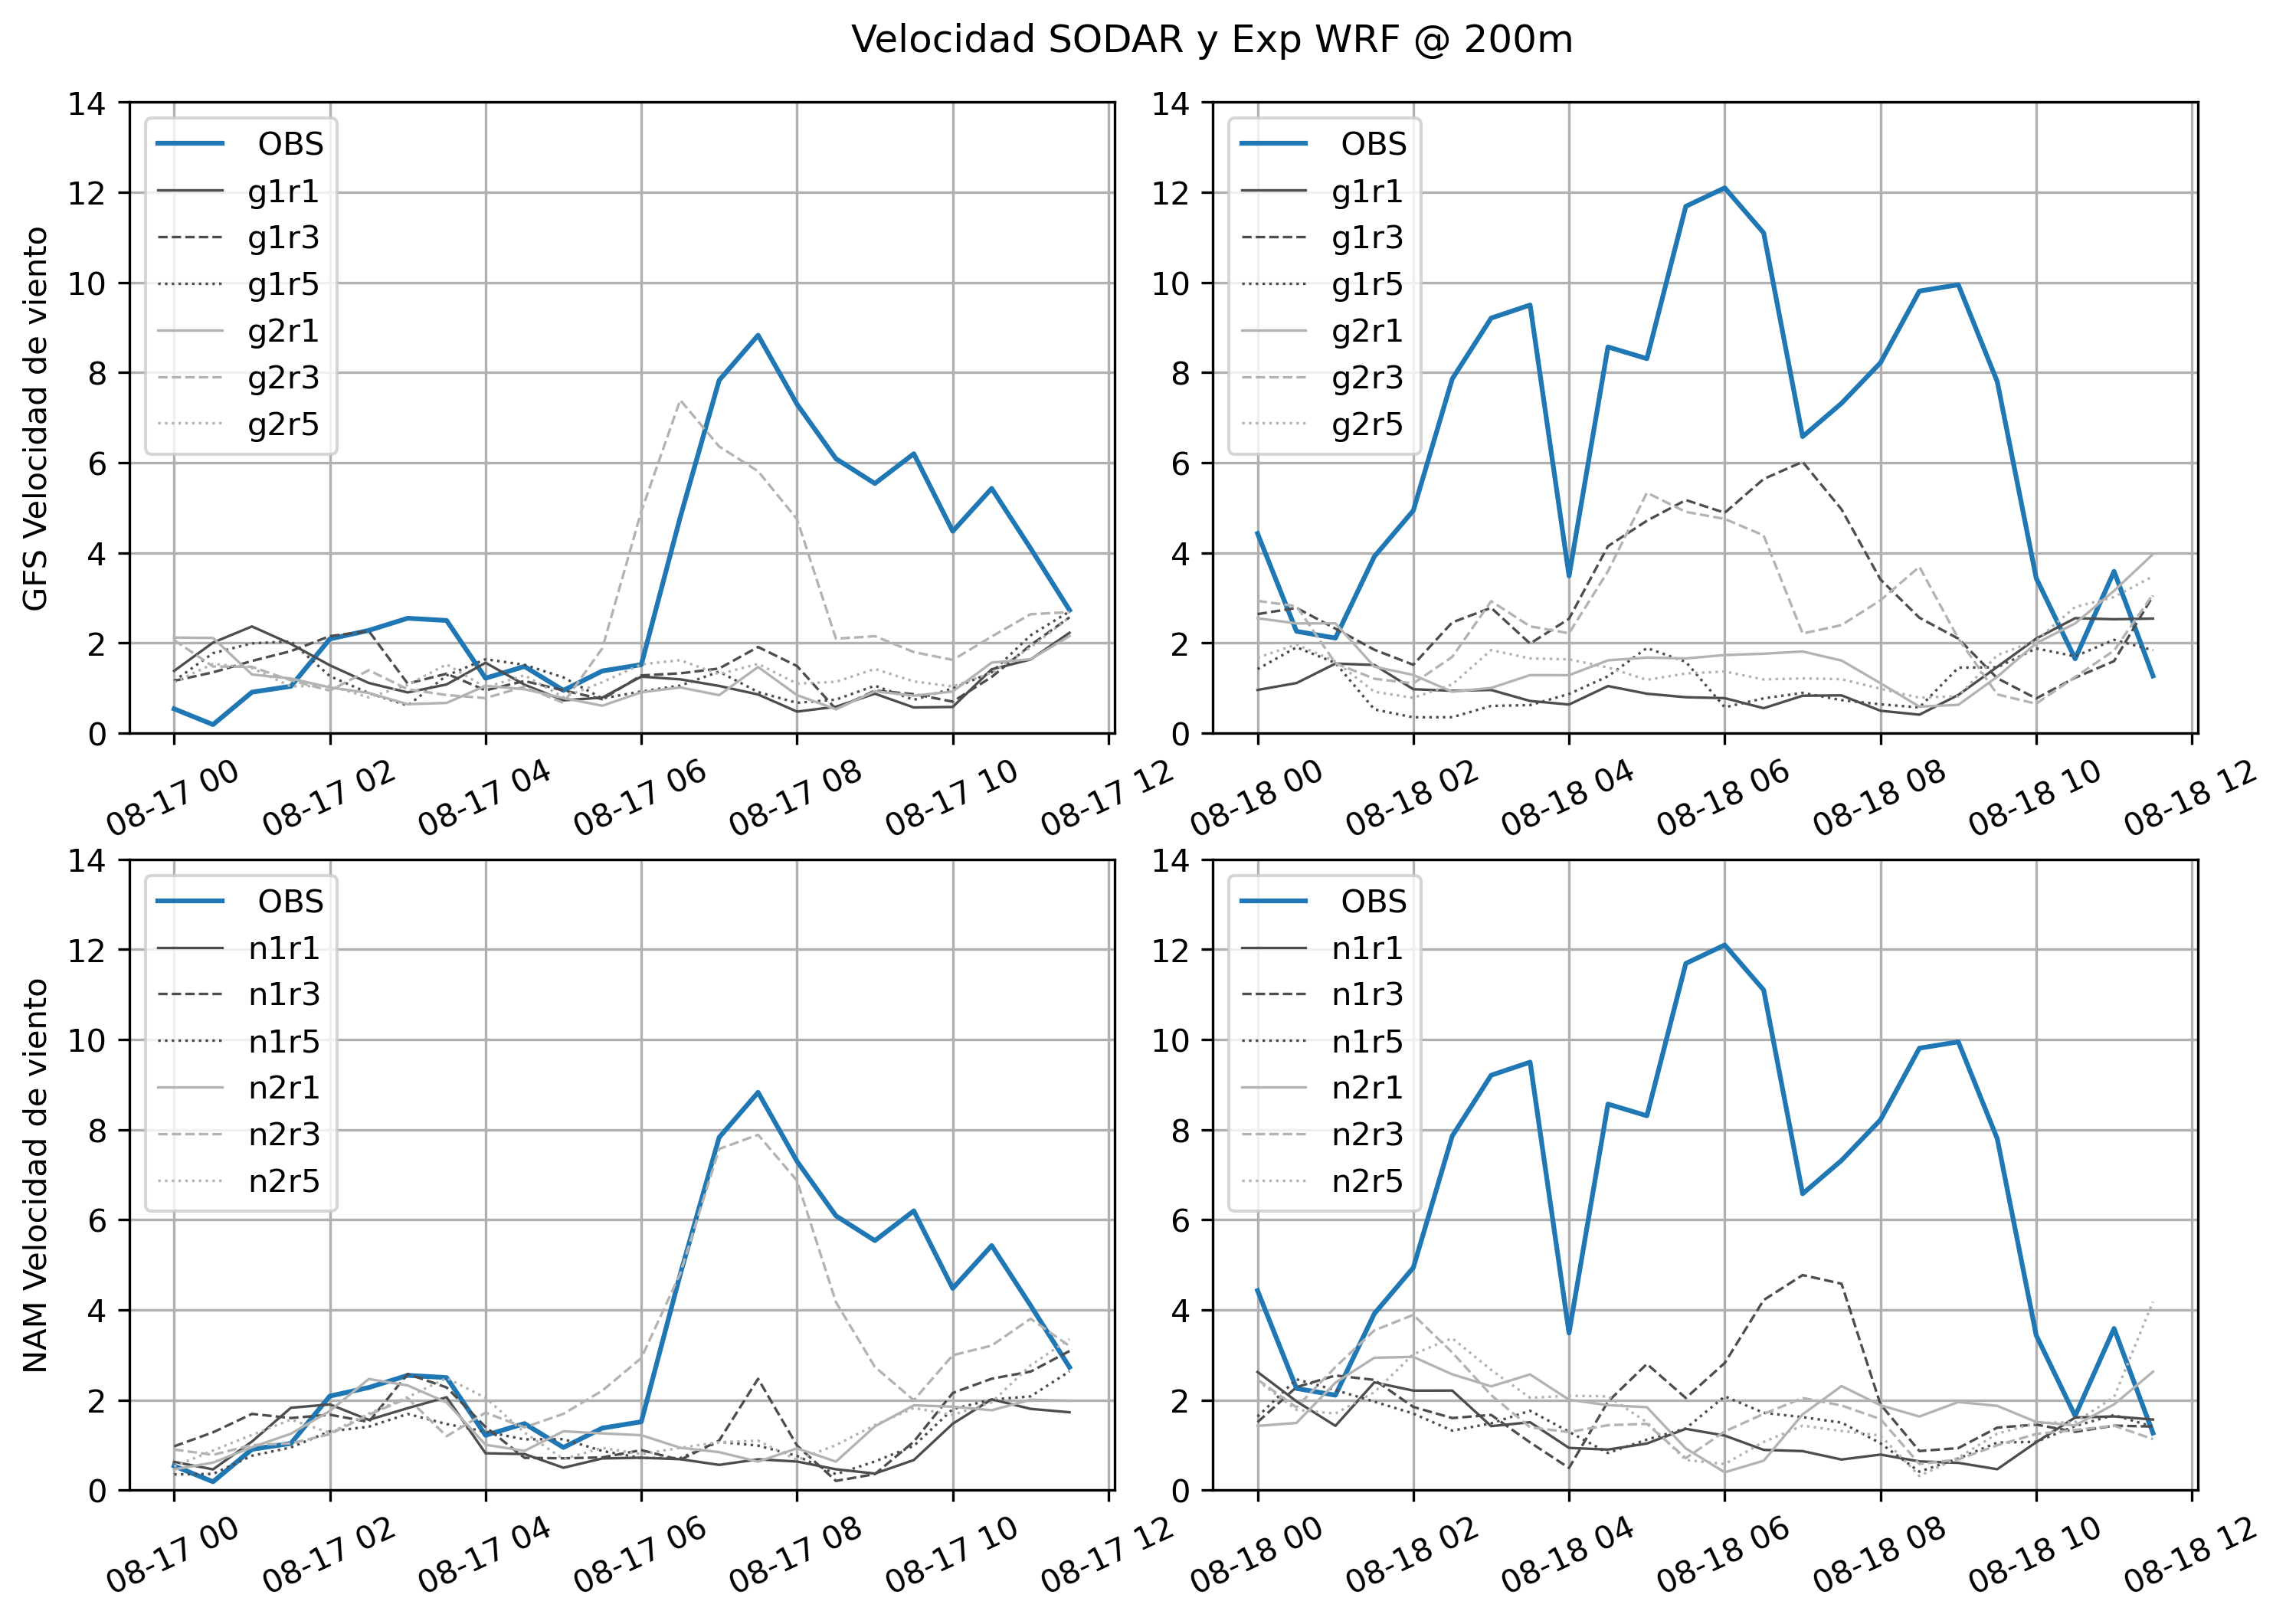

In [16]:
t1, t2, t3, t4 = 0, 24, 48, 72
panelPlot2gn(level=5)


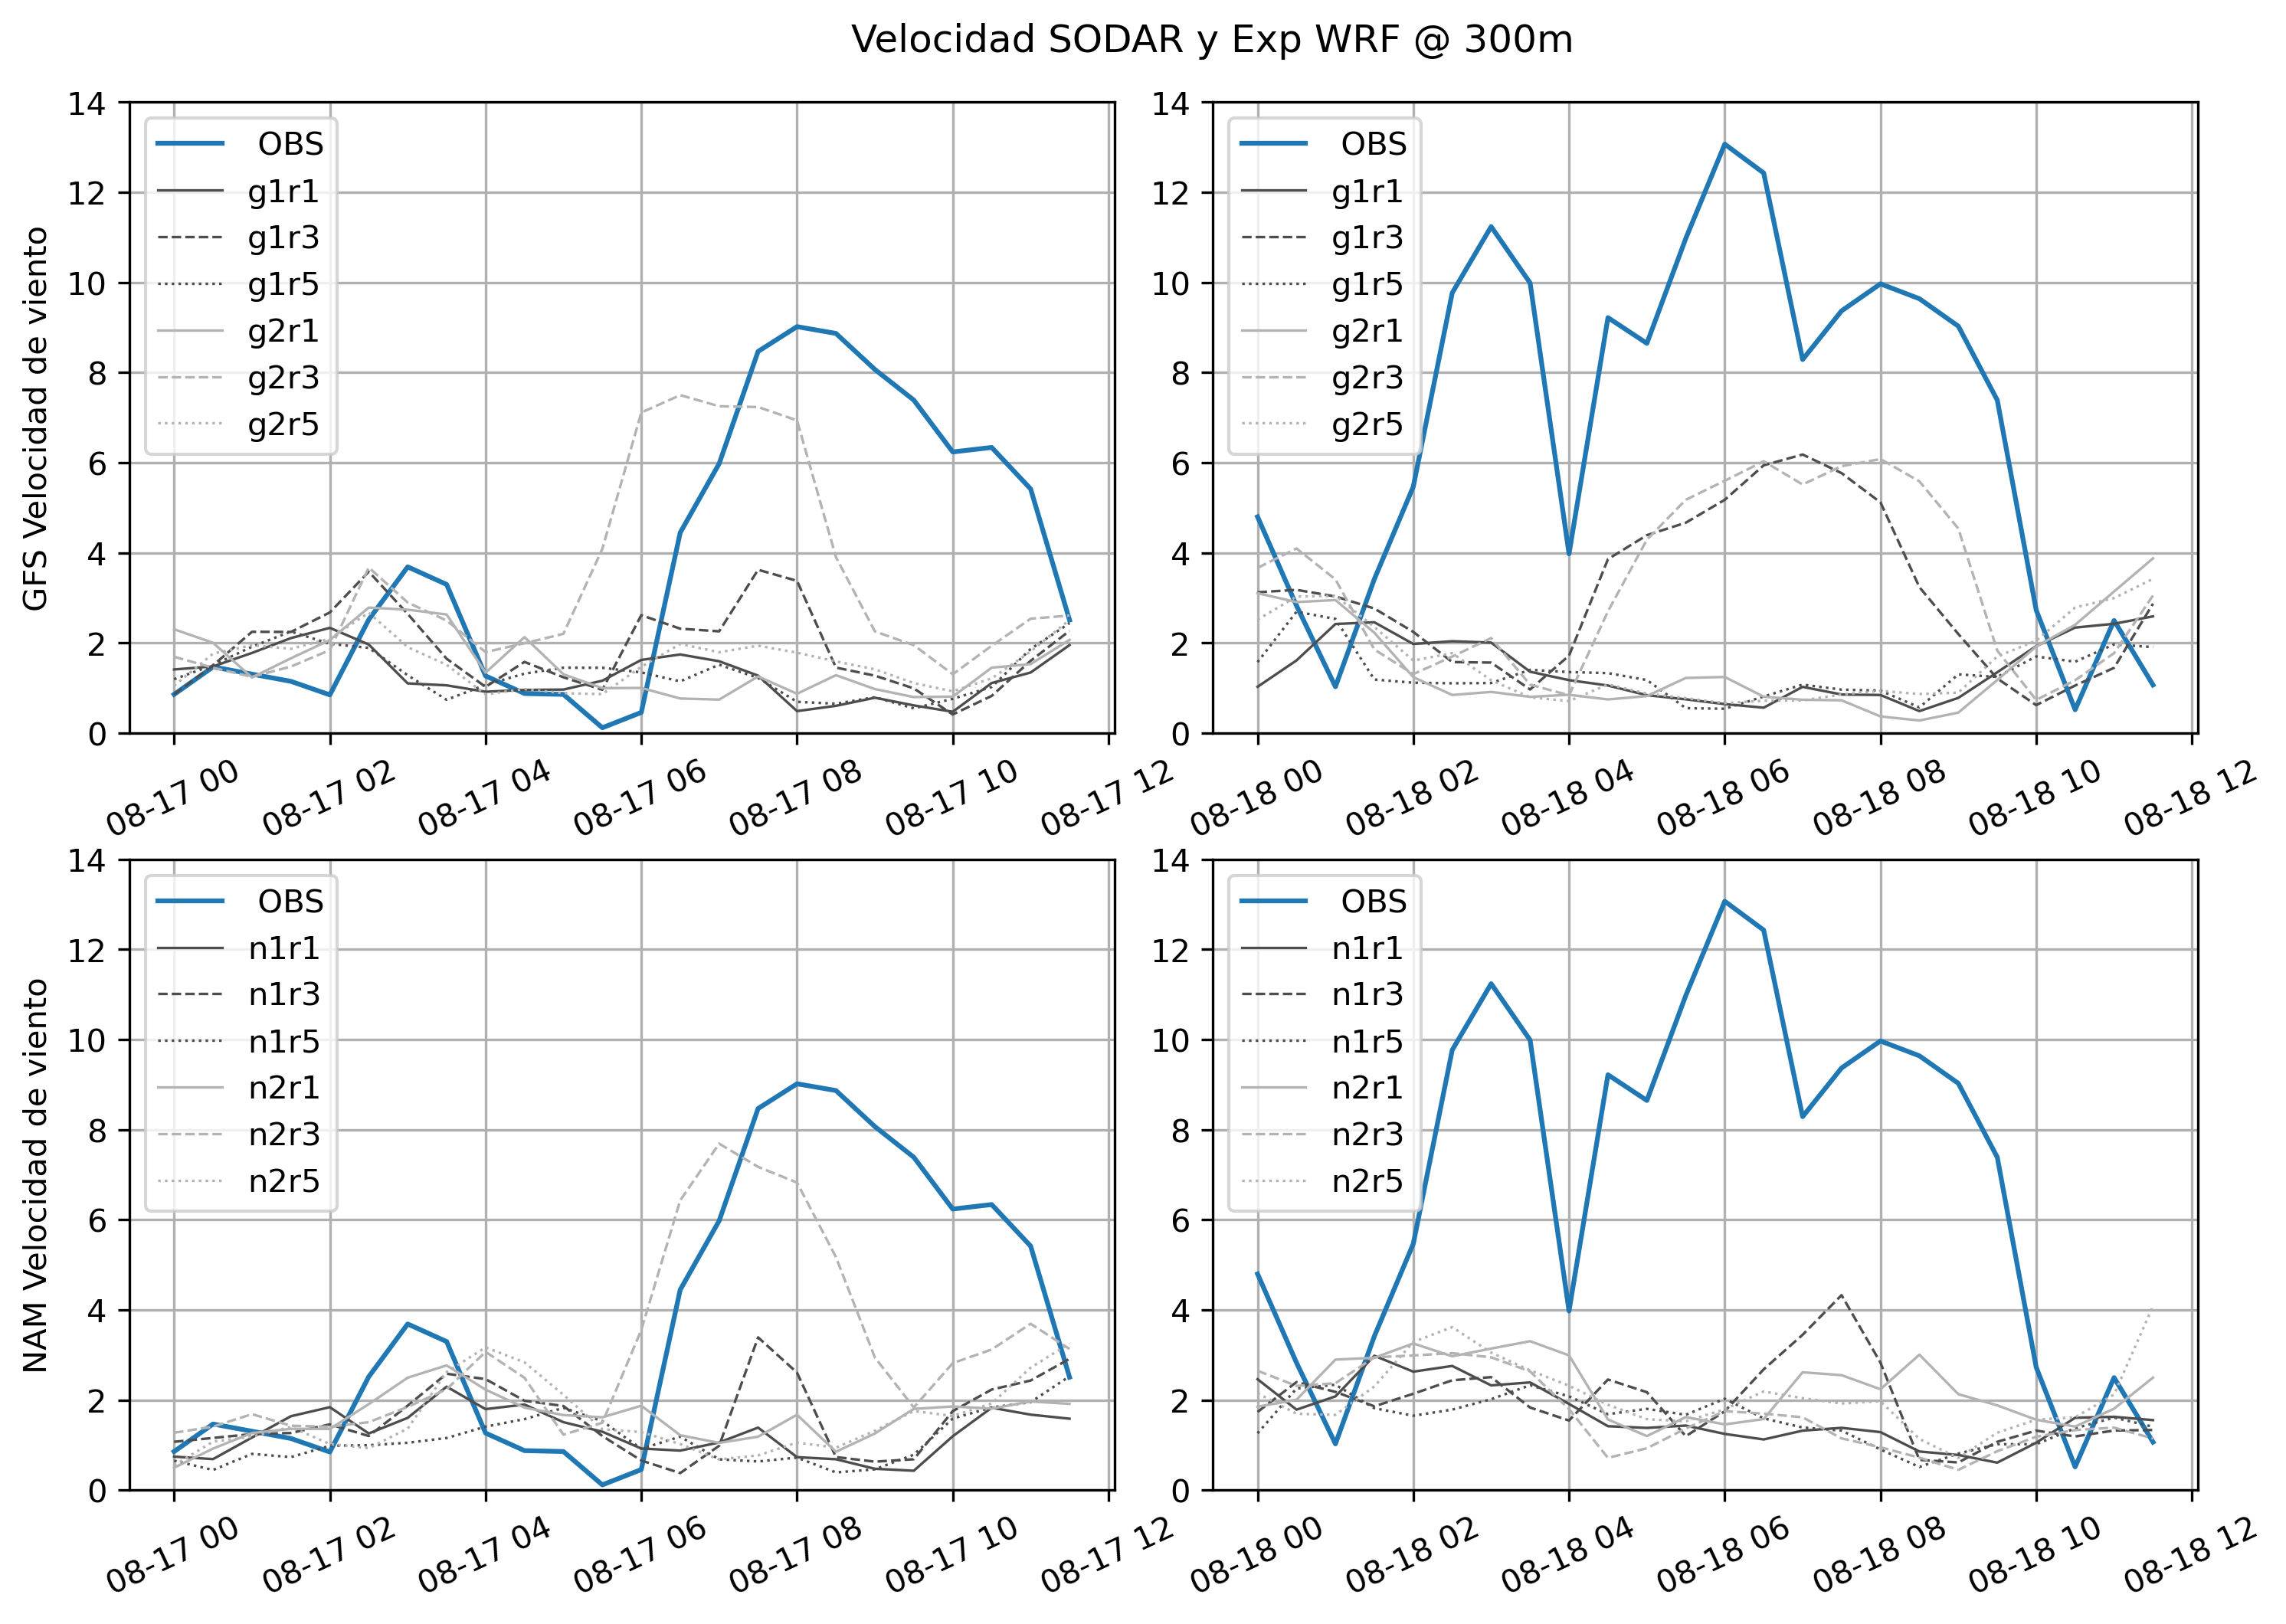

In [17]:
t1, t2, t3, t4 = 0, 24, 48, 72
panelPlot2gn(level=7)


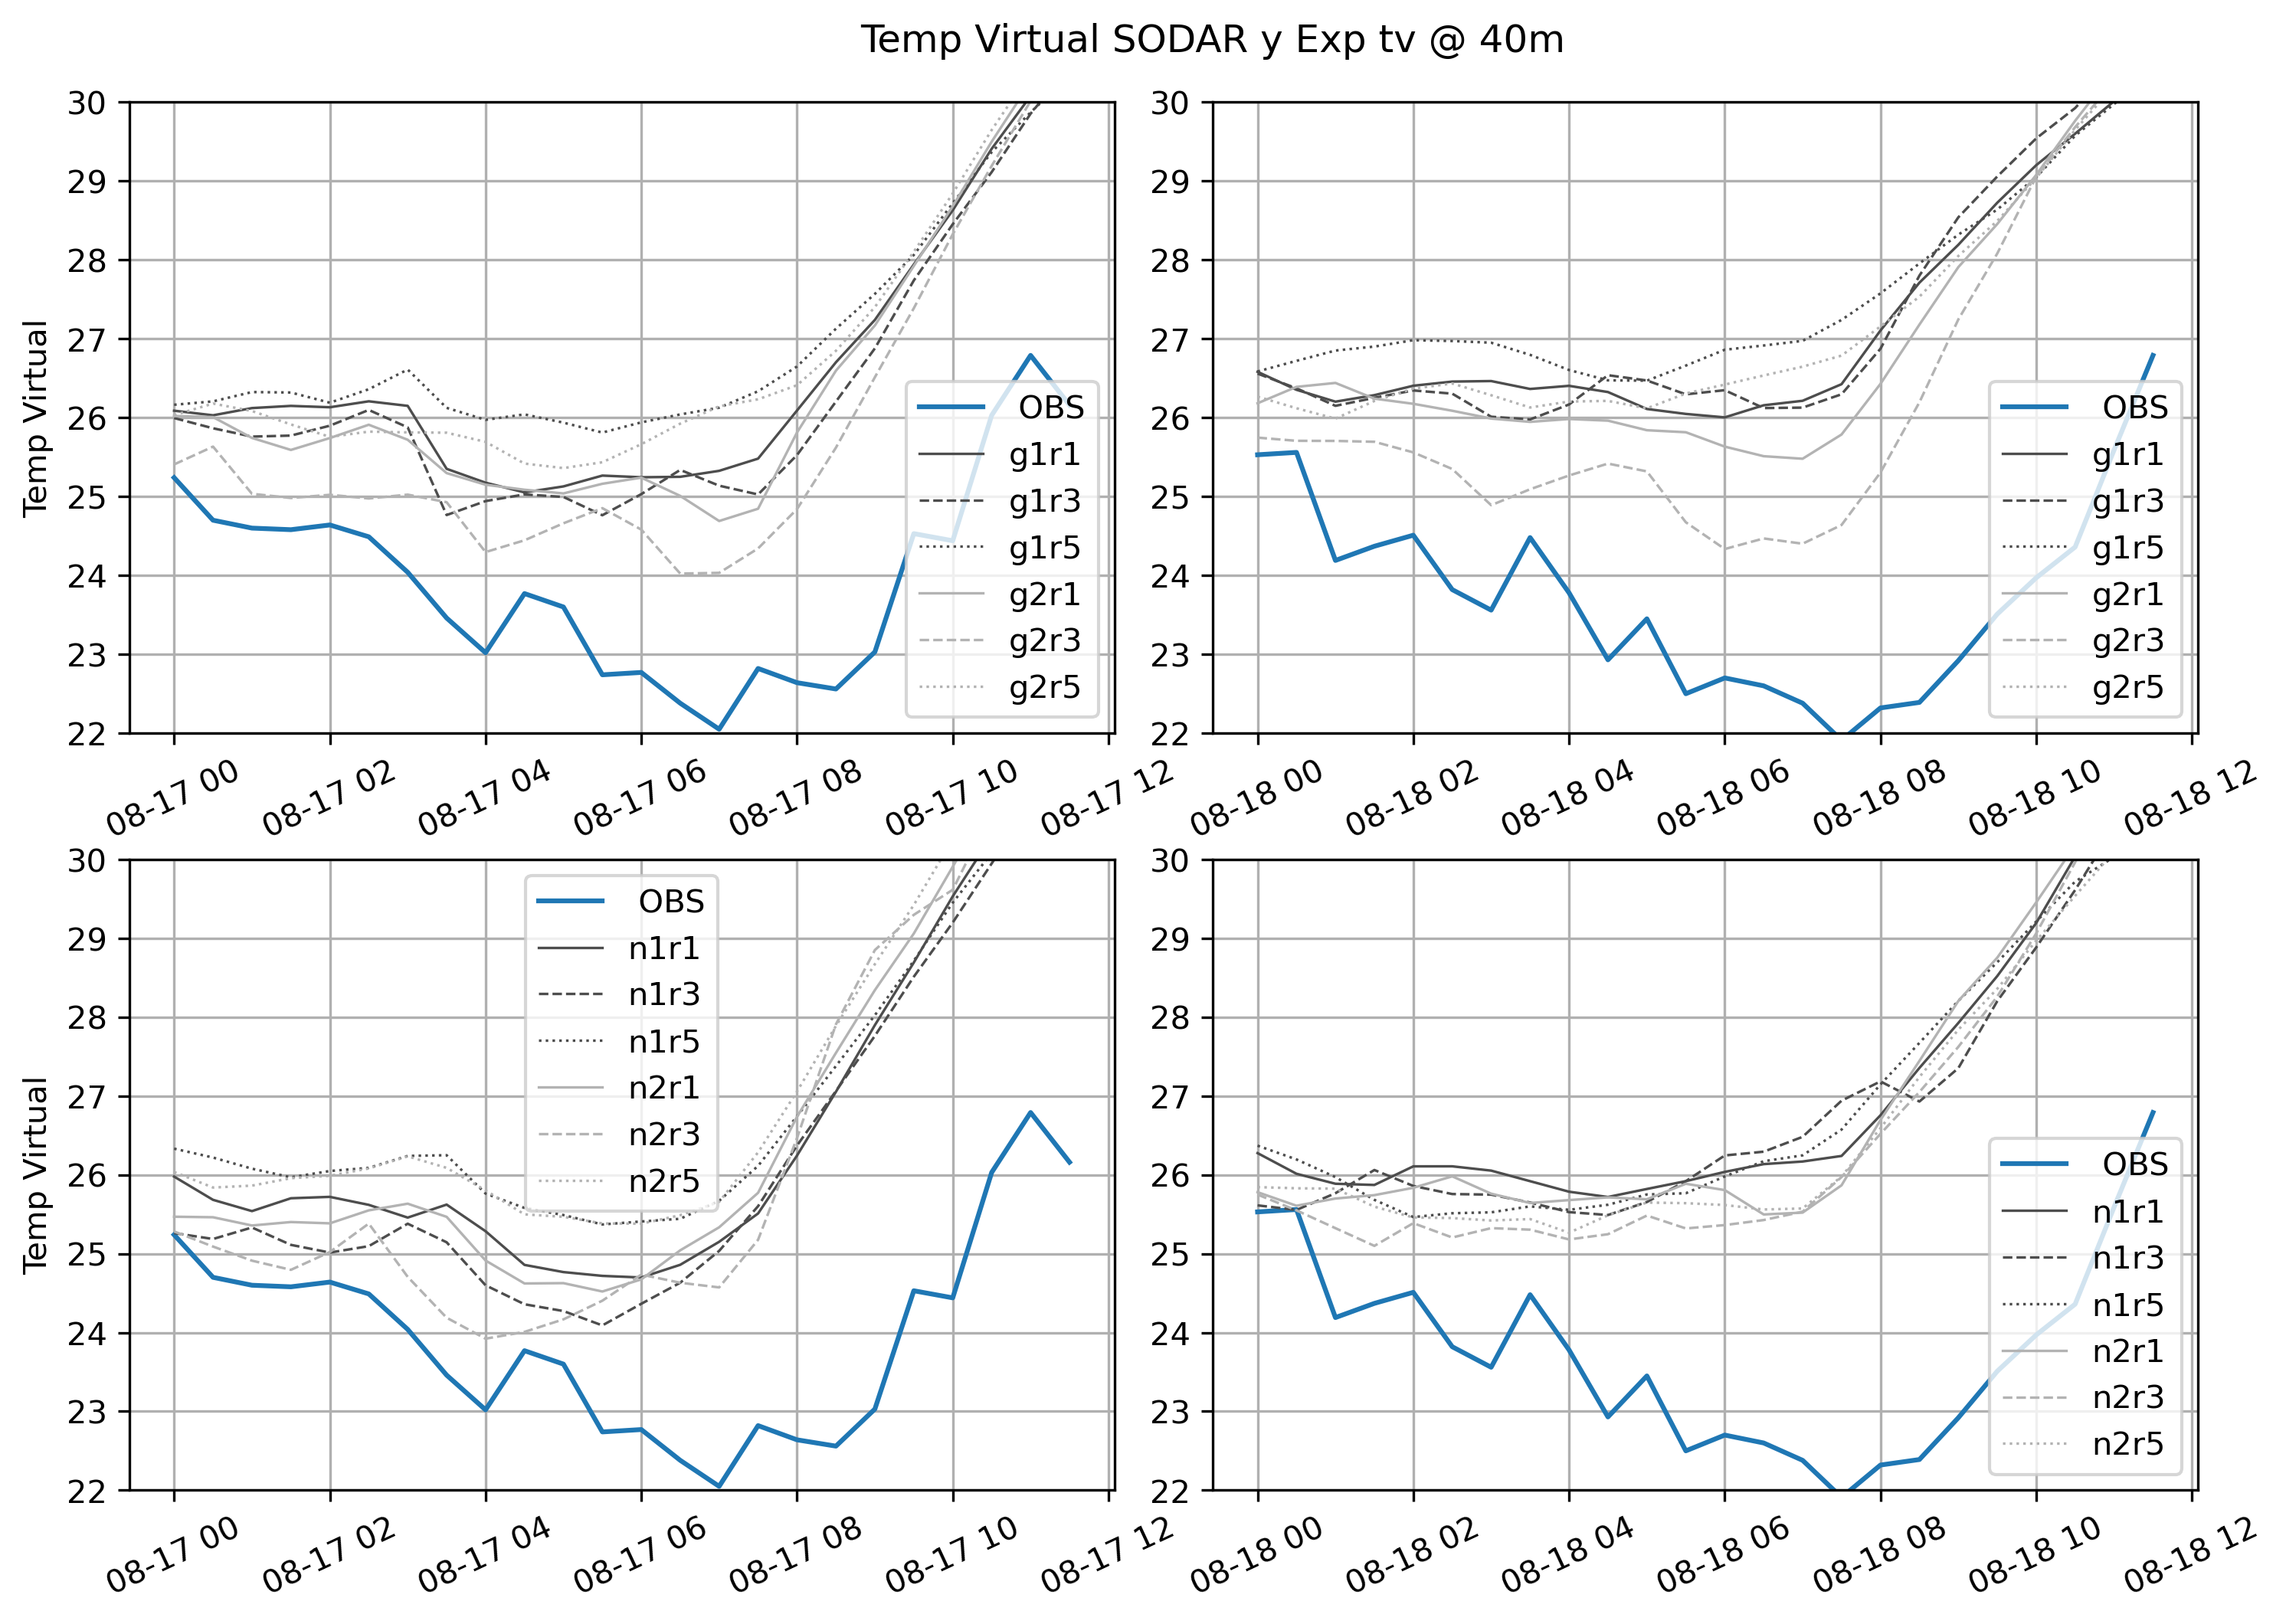

In [18]:
t1, t2, t3, t4 = 0, 24, 48, 72
tv_1, tv_2 = 22, 30
panelPlot2Tgn(level=1)


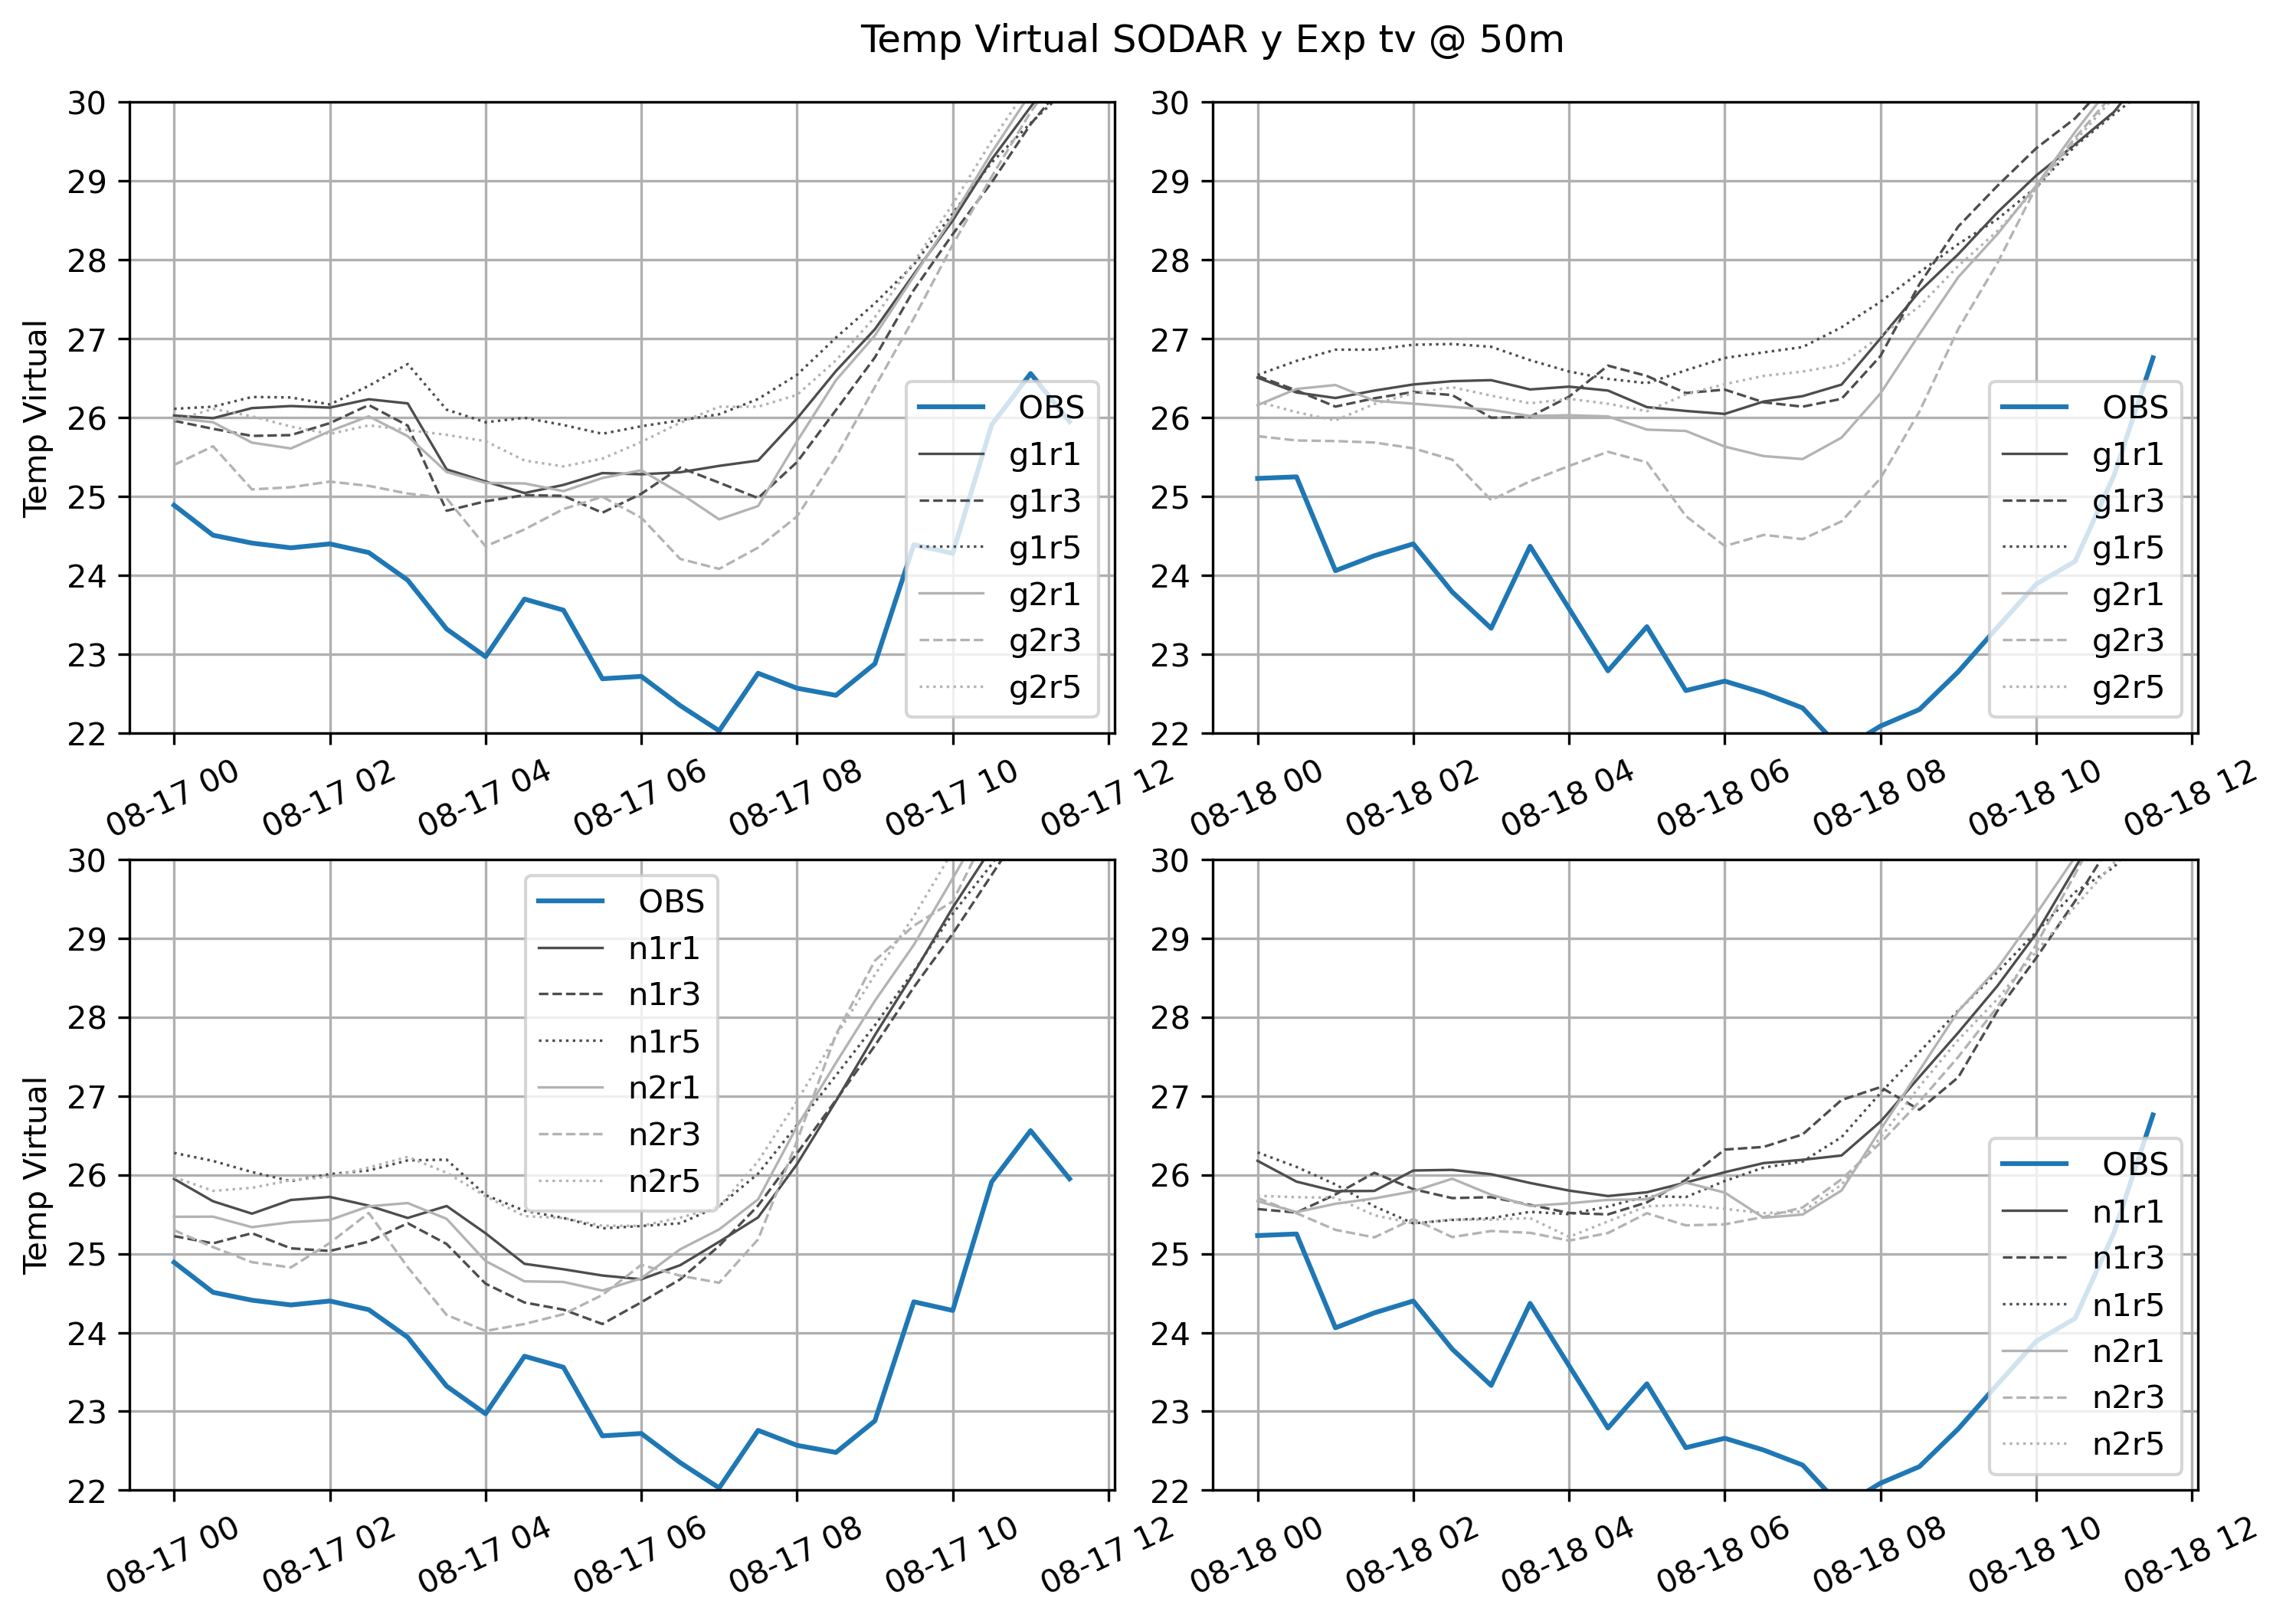

In [19]:
t1, t2, t3, t4 = 0, 24, 48, 72
tv_1, tv_2 = 22, 30
panelPlot2Tgn(level=2)

10 14 18
2012-08-17 07:00:00
10 14 18
2012-08-17 07:00:00


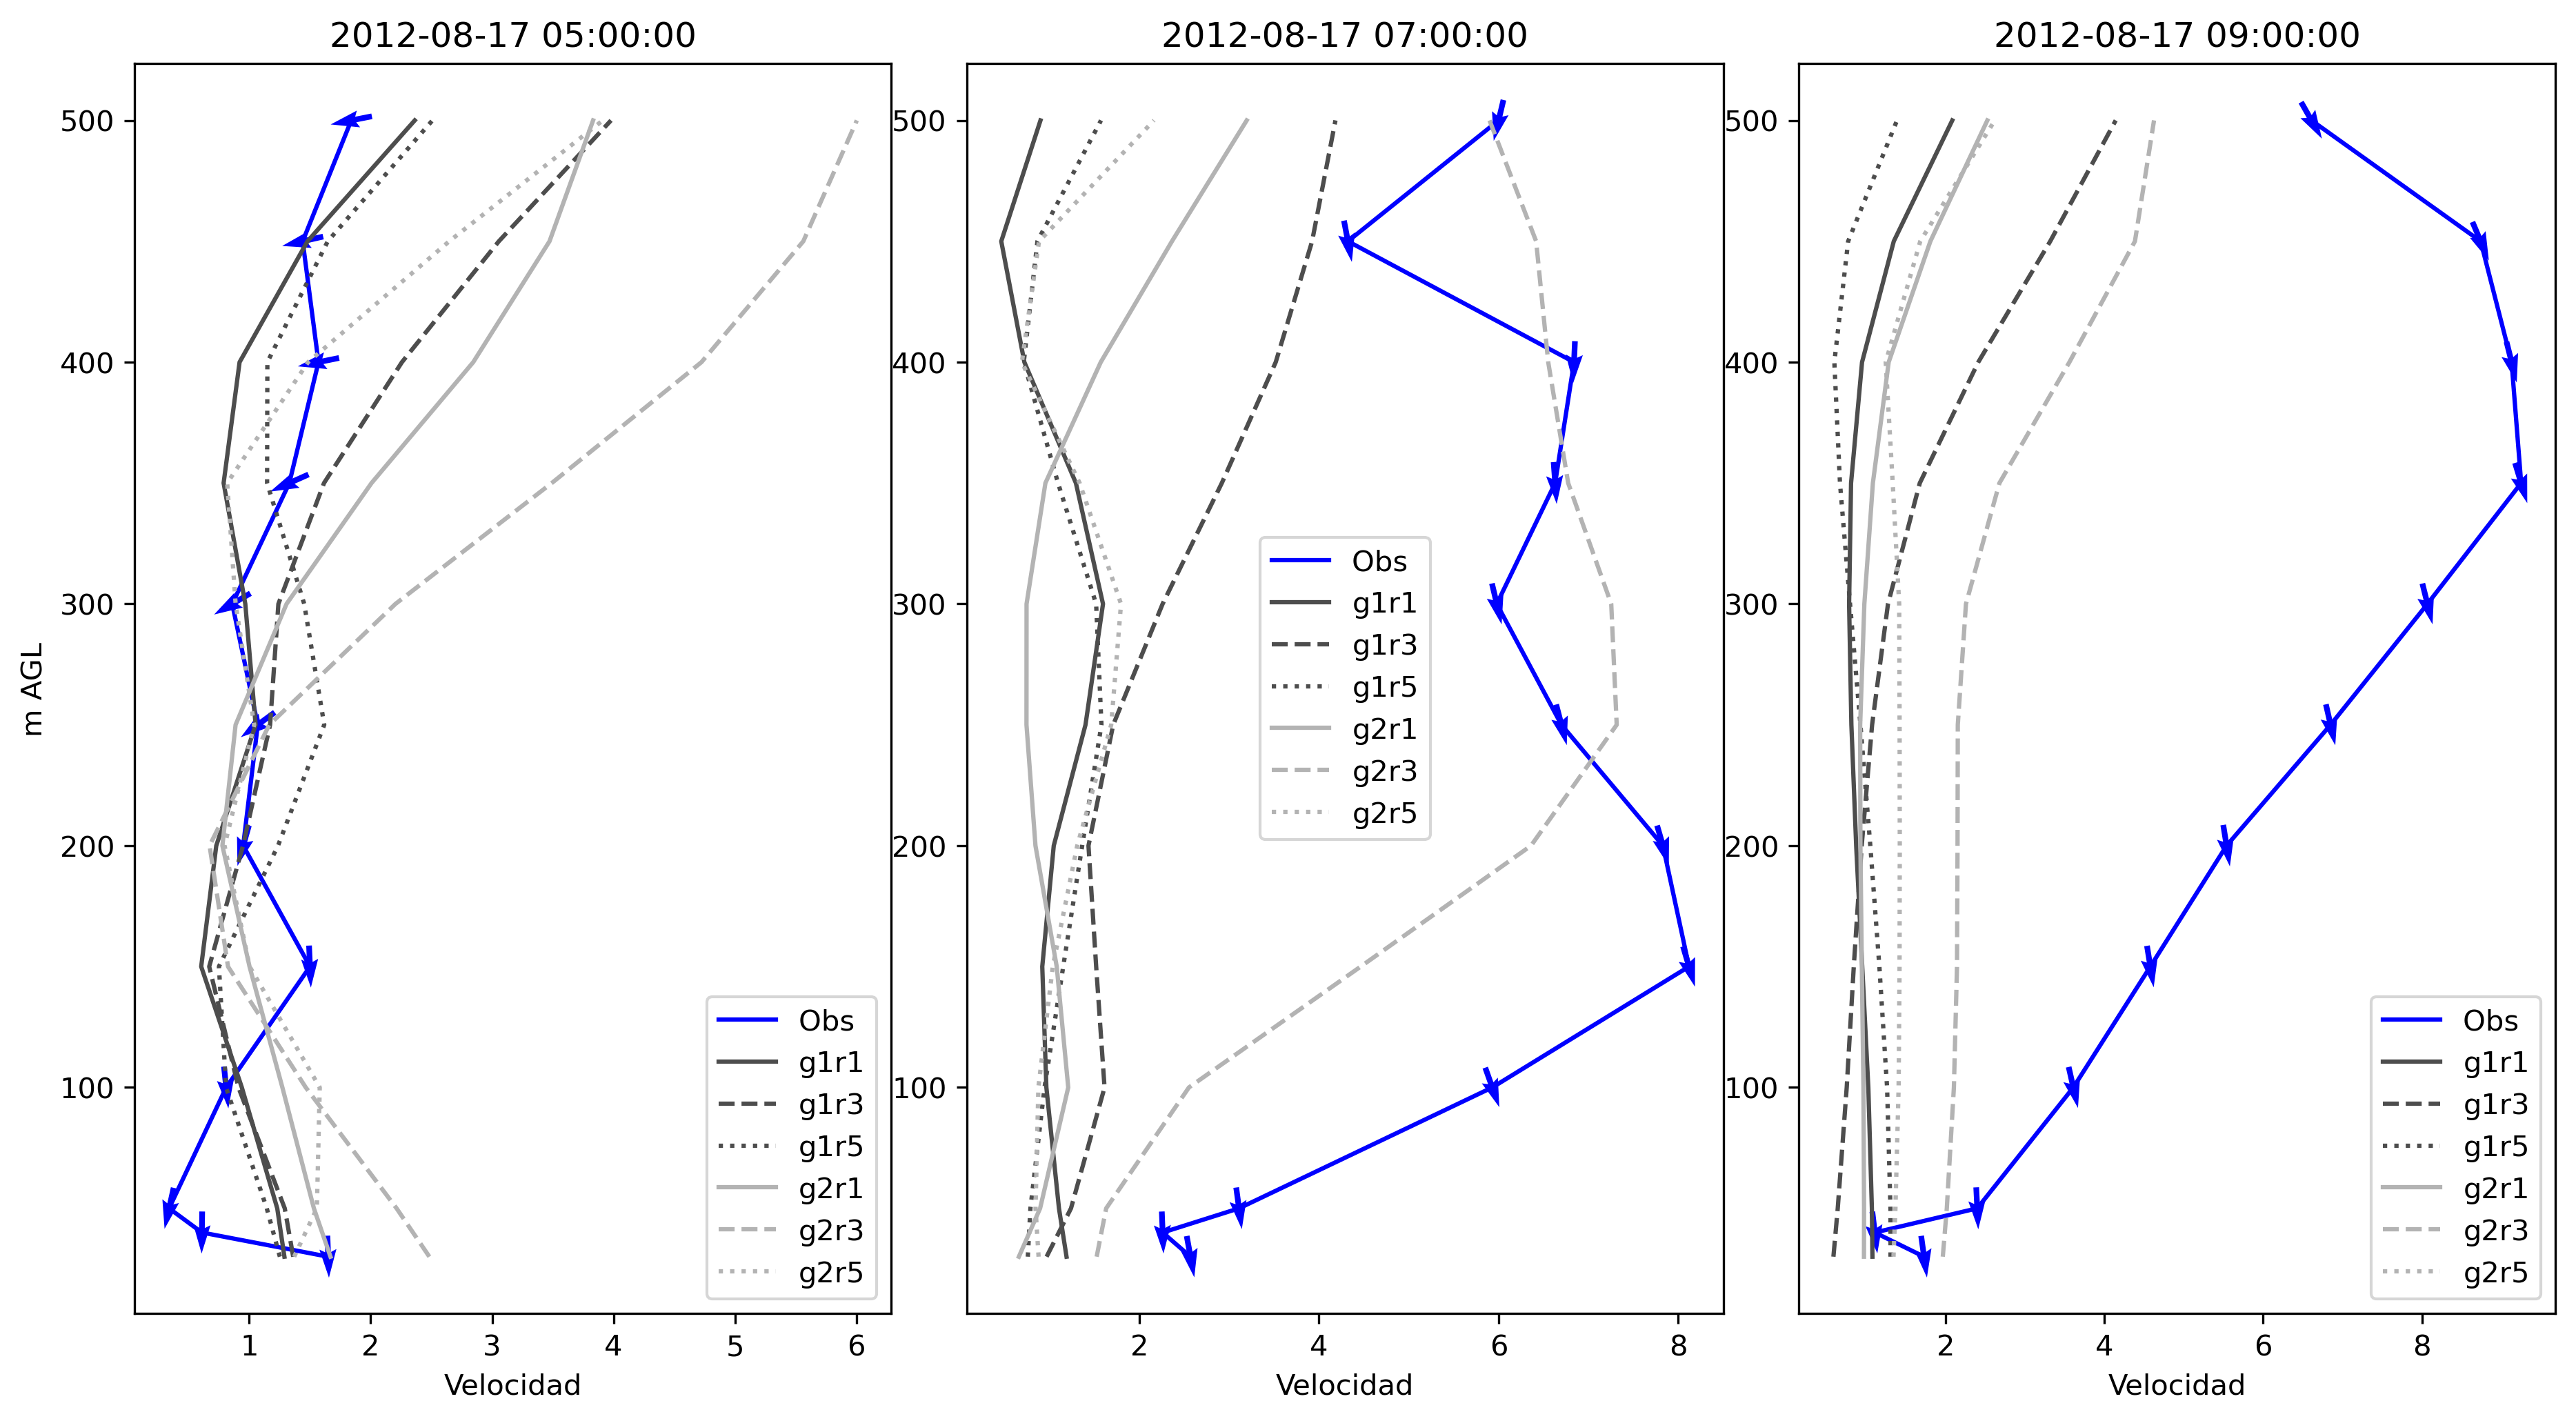

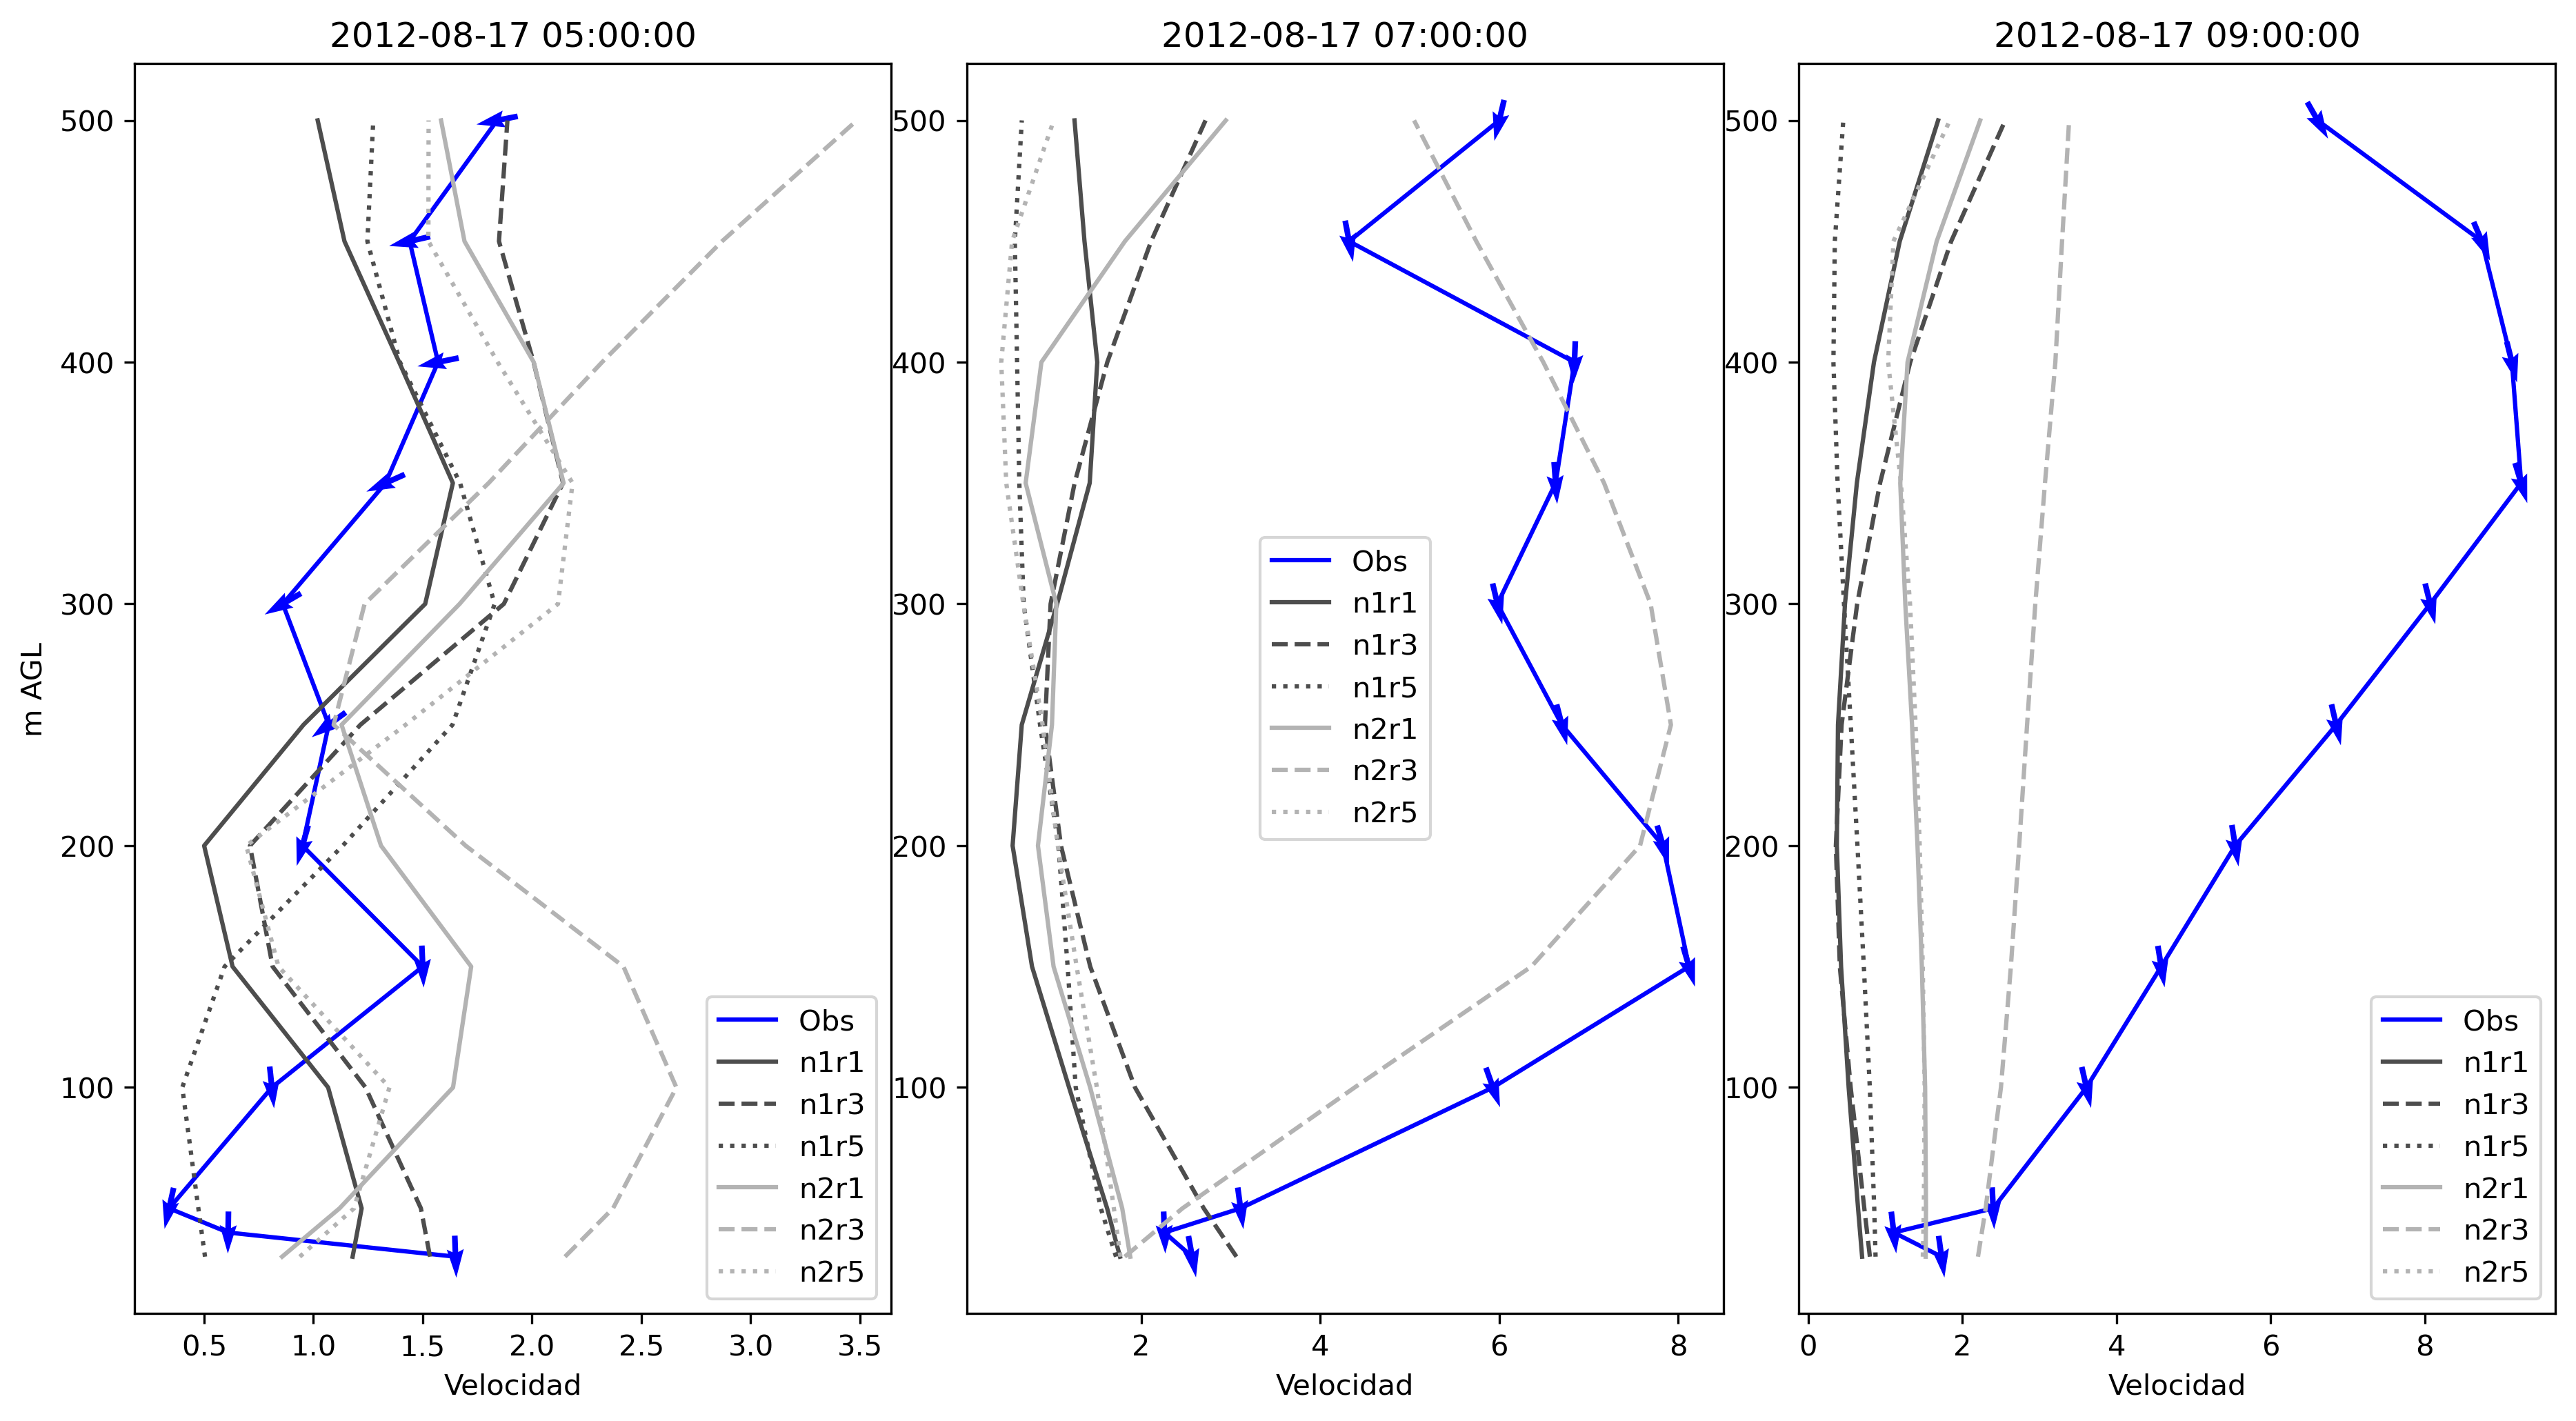

In [20]:
tt0, tt, tt2= 10, 14, 18
ProfilesPanel3g(tt0,tt,tt2)
print(xt[tt])

ProfilesPanel3n(tt0,tt,tt2)
print(xt[tt])

10 14 18
2012-08-17 07:00:00


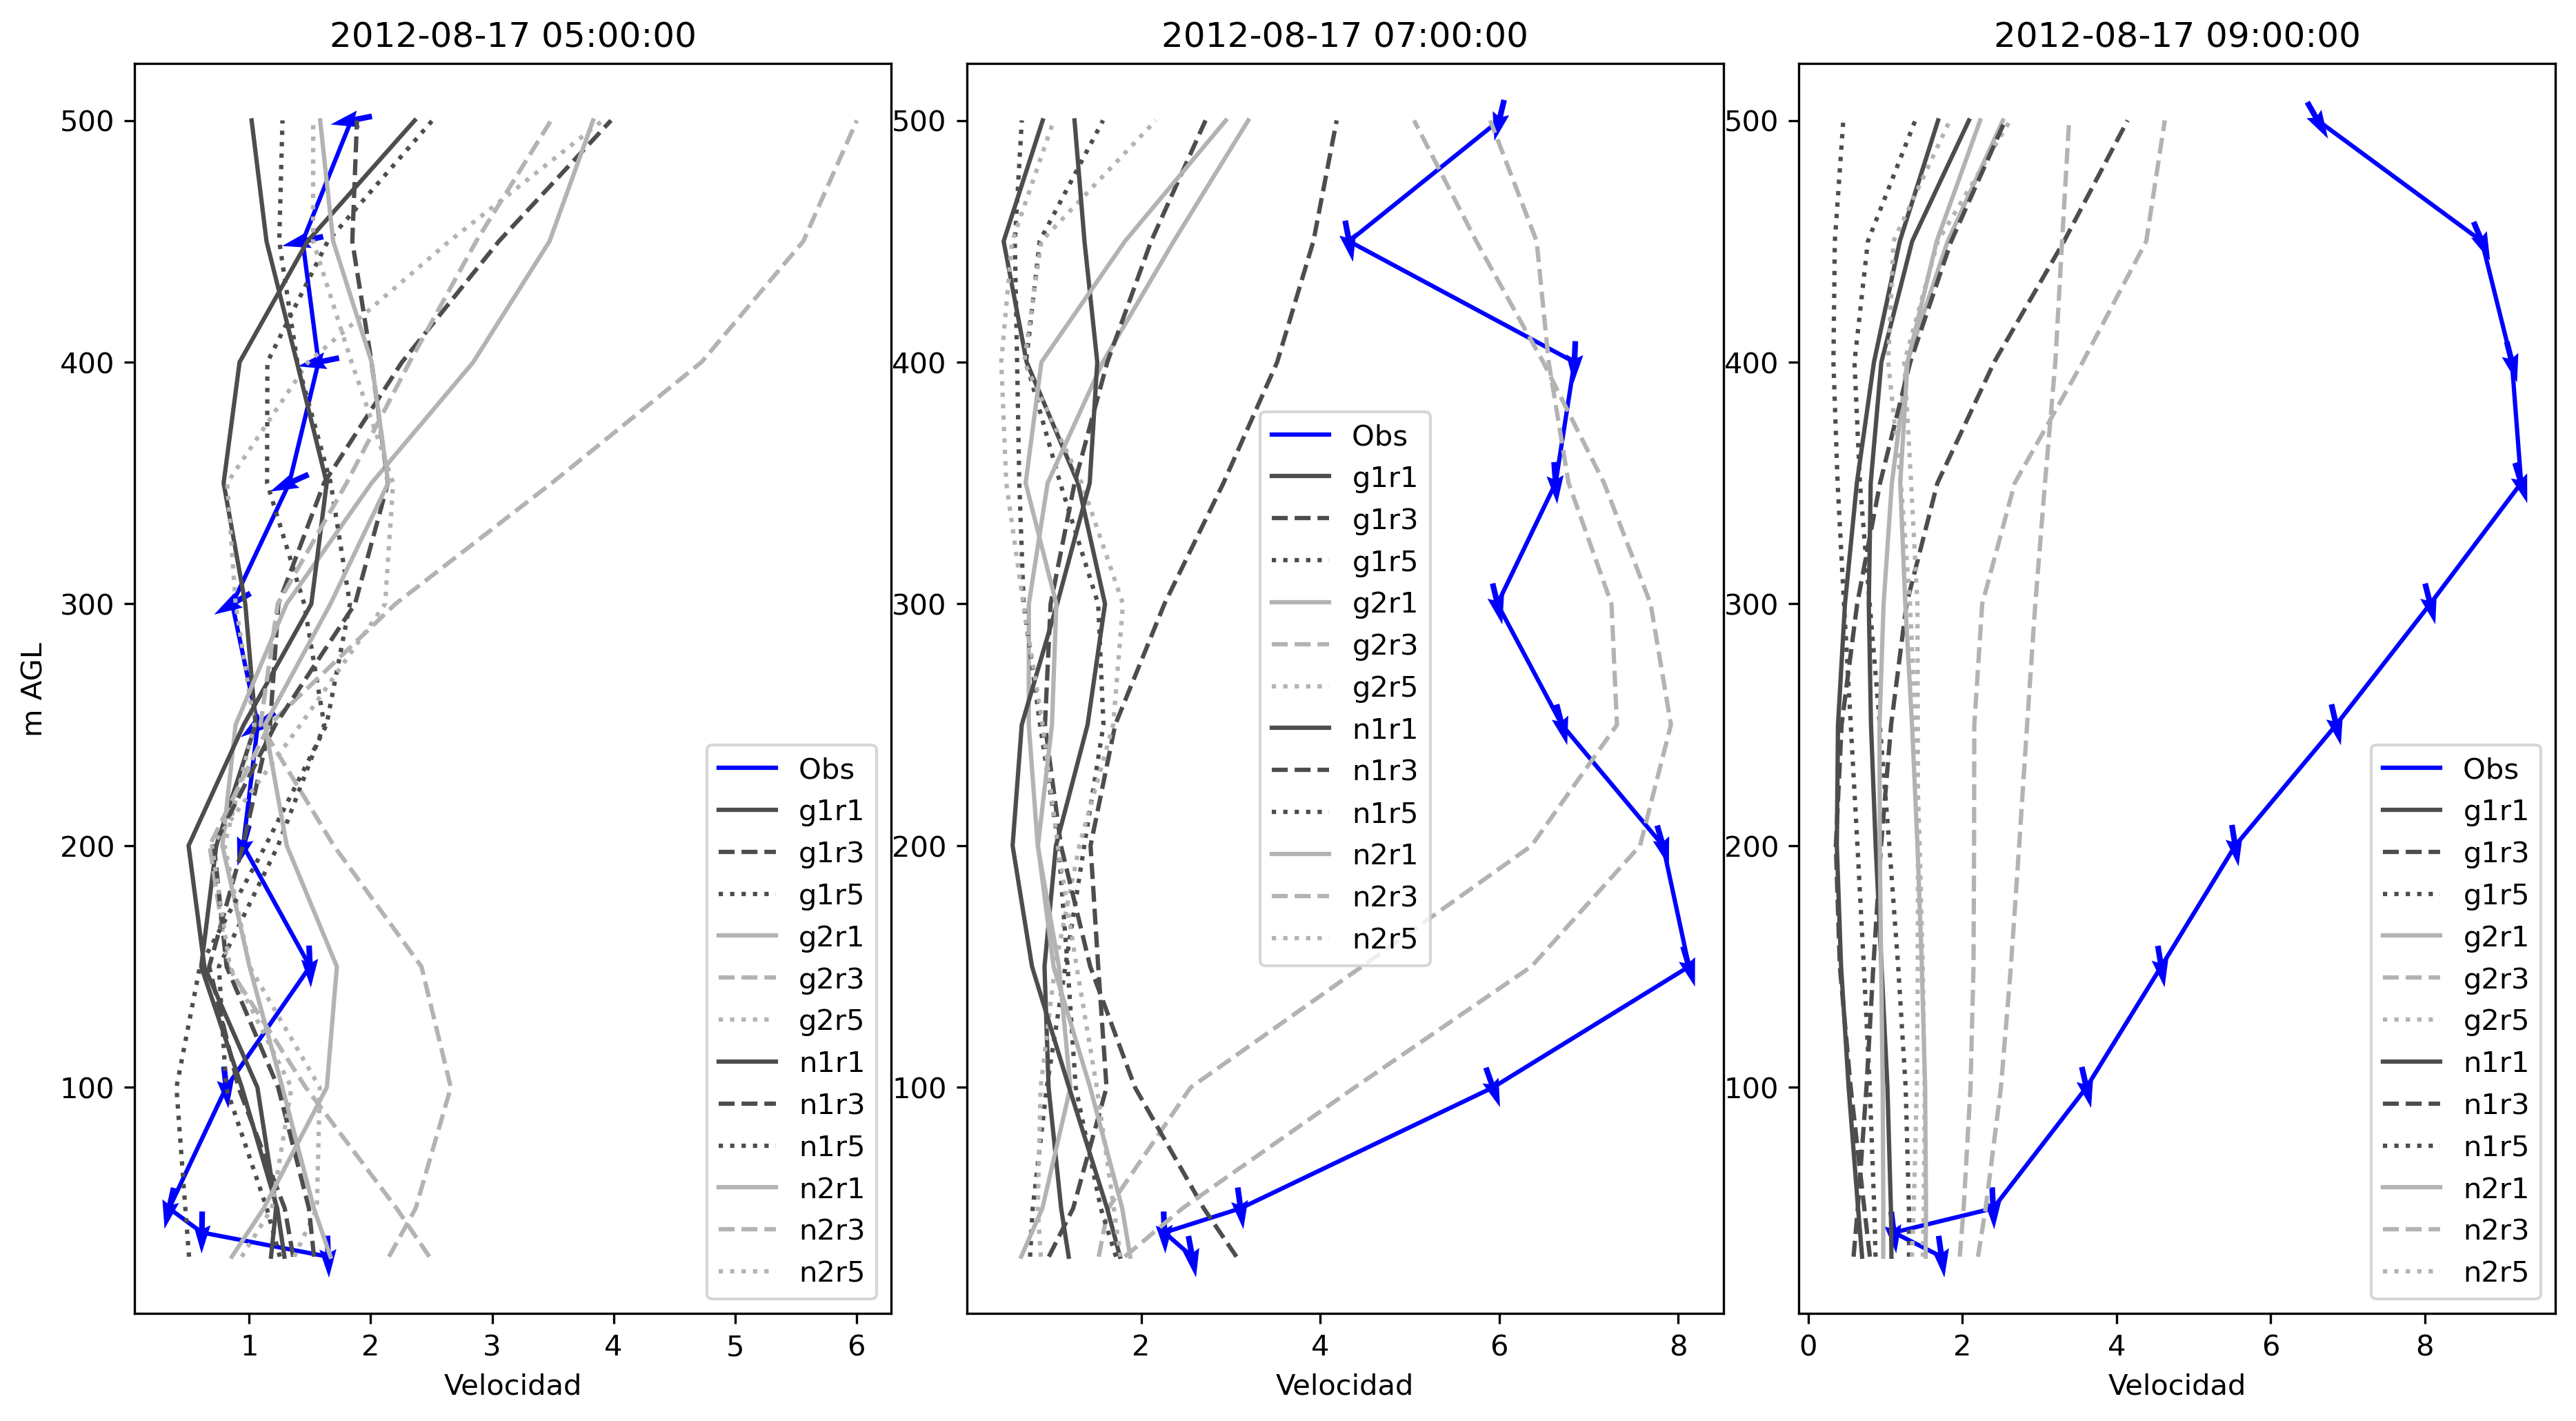

In [65]:
tt0, tt, tt2= 10, 14, 18
ProfilesPanel3gn(tt0,tt,tt2)
print(xt[tt])
